[矢吹太朗『コンピュータでとく数学』（オーム社, 2024）](https://github.com/taroyabuki/comath)




# 1 実行環境

In [1]:
install.packages(c("ellipse", "exactci", "matrixcalc", "mnormt", "pracma"),
                 repos = "https://cran.rstudio.com/") # reposは必須ではない．

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘ssanv’




In [2]:
data <- data.frame(x1 = c(1, 3, 6, 10), y = c(7, 1, 6, 14))
model <- lm(y ~ x1, data)
summary(model)


Call:
lm(formula = y ~ x1, data = data)

Residuals:
 1  2  3  4 
 4 -4 -2  2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   2.0000     3.9837   0.502    0.665
x1            1.0000     0.6594   1.517    0.269

Residual standard error: 4.472 on 2 degrees of freedom
Multiple R-squared:  0.5349,	Adjusted R-squared:  0.3023 
F-statistic:   2.3 on 1 and 2 DF,  p-value: 0.2686


# 2 数と変数

In [3]:
2 * (-3)

[1] -6

In [4]:
(1 + 2) * 3

[1] 9

In [5]:
2^10

[1] 1024

In [6]:
2**10

[1] 1024

In [7]:
-2 < -1

[1] TRUE

In [8]:
2 + 2 == 5

[1] FALSE

In [9]:
if (7 < 5) 10 else 20

[1] 20

In [10]:
!(0 < 1)

[1] FALSE

In [11]:
(0 < 1) | (2 > 3)

[1] TRUE

In [12]:
(0 < 1) & (2 > 3)

[1] FALSE

In [13]:
x = 5; x == 5

[1] TRUE

In [14]:
a = 1 + 2
b = 9
a * (b + 1)

[1] 30

In [15]:
a = 1 + 2; b = 9; a * (b + 1)

[1] 30

In [16]:
(a <- 1 + 2)

[1] 3

In [17]:
x1 = 2; x2 = 3; x1 + x2

[1] 5

In [18]:
x = 1; y = x + 1; x = 2; y

[1] 2

In [19]:
f <- function(x) { 2 * x + 3 }
f(5)

[1] 13

In [20]:
f <- function(x) { 1 / x }
f(1)

[1] 1

In [21]:
(function(x) 2 * x + 3)(5)

[1] 13

In [22]:
f <- function(x, y) { x + y }
f(2, 3)

[1] 5

In [23]:
g <- function(x) { x[1] + x[2] }
x <- c(2, 3); g(x)

[1] 5

In [24]:
do.call(f, as.list(x))

[1] 5

In [25]:
g(c(2, 3))

[1] 5

In [26]:
0.1 + 0.2 == 0.3

[1] FALSE

In [27]:
all.equal(0.1 + 0.2, 0.3)

[1] TRUE

In [28]:
options(digits = 22) # 表示桁数の設定（デフォルトは7）
9007199254740992 + 1
options(digits = 7)

[1] 9007199254740992

# 3 データ構造

In [29]:
v <- c(2, 3, 5); length(v)

[1] 3

In [30]:
v[3] <- 0.5; v

[1] 2.0 3.0 0.5

In [31]:
1:5

[1] 1 2 3 4 5

In [32]:
seq(0, 1, 0.1)

[1] 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0

In [33]:
seq(0, 100, length.out = 5)

[1]   0  25  50  75 100

In [34]:
v <- c(2, 3)
1.1 * v

[1] 2.2 3.3

In [35]:
u <- c(10, 20); v <- c(2, 3)
u + v

[1] 12 23

In [36]:
v + 1

[1] 3 4

In [37]:
u <- c(10, 20); v <- c(2, 3)
print(u %*% v)    # 結果は1行1列の行列（非推奨）
print(sum(u * v)) # 結果は数

     [,1]
[1,]   80
[1] 80


In [38]:
a <- c(2, 3, 4); b <- a; b[3] <- 0.5; a

[1] 2 3 4

In [39]:
v <- c(2, -1, 3, -2)
v[v > 0] # []の中はベクトル化（後述）されていなければならない．

[1] 2 3

In [40]:
v <- c(2, -1, 3, -2)
ifelse(v < 0, 0, 1)

[1] 1 0 1 0

In [41]:
v <- c(2, -1, 3, -2)
n <- length(v)  # vのサイズ
u <- rep(NA, n) # NAは「値がない」ということ．
for (i in 1:n) { u[i] <- if (v[i] < 0) 0 else 1 }
u

[1] 1 0 1 0

In [42]:
v <- c(2, -1, 3, -2)
f <- function(x) { if (x < 0) 0 else 1 }
sapply(v, f)

[1] 1 0 1 0

In [43]:
f <- Vectorize(function(x) { if (x < 0) 0 else 1 })
f1 <- function(x) { ifelse(x < 0, 0, 1) } # ifelseはベクトル化されている．
print(f(v)); print(f1(v))

[1] 1 0 1 0
[1] 1 0 1 0


In [44]:
u <- c(1, 7, 2, 9); v <- c(2, 3, 5, 7)
print(ifelse(u < v, -1, 1)) # この例ではこのほうが簡潔．
f <- function(a, b) {if (a < b) -1 else 1 }
print(mapply(f, u, v))

[1] -1  1 -1  1
[1] -1  1 -1  1


In [45]:
x <- list("apple" = "りんご", "orange" = "みかん")
x[["orange"]]

[1] "みかん"

In [46]:
x[["grape"]] <- "ぶどう"
x[["grape"]]

[1] "ぶどう"

In [47]:
x[["apple"]] <- NULL
!is.null(x[["apple"]])

[1] FALSE

In [48]:
(df <- data.frame(name = c("A", "B", "C"),
                  english = c(60, 90, 70),
                  math = c(70, 80, 90),
                  gender = c("f", "m", "m")))

name,english,math,gender
<chr>,<dbl>,<dbl>,<chr>
A,60,70,f
B,90,80,m
C,70,90,m


In [49]:
(df <- rbind(data.frame(name = "A", english = 60, math = 70, gender = "f"),
             data.frame(name = "B", english = 90, math = 80, gender = "m"),
             data.frame(name = "C", english = 70, math = 90, gender = "m")))

name,english,math,gender
<chr>,<dbl>,<dbl>,<chr>
A,60,70,f
B,90,80,m
C,70,90,m


In [50]:
df[, c("english", "math")]

english,math
<dbl>,<dbl>
60,70
90,80
70,90


In [51]:
df$"english"

[1] 60 90 70

In [52]:
df$english

[1] 60 90 70

In [53]:
(m <- as.matrix(df[, c(2, 3)]))

english,math
60,70
90,80
70,90


# 4 可視化と方程式

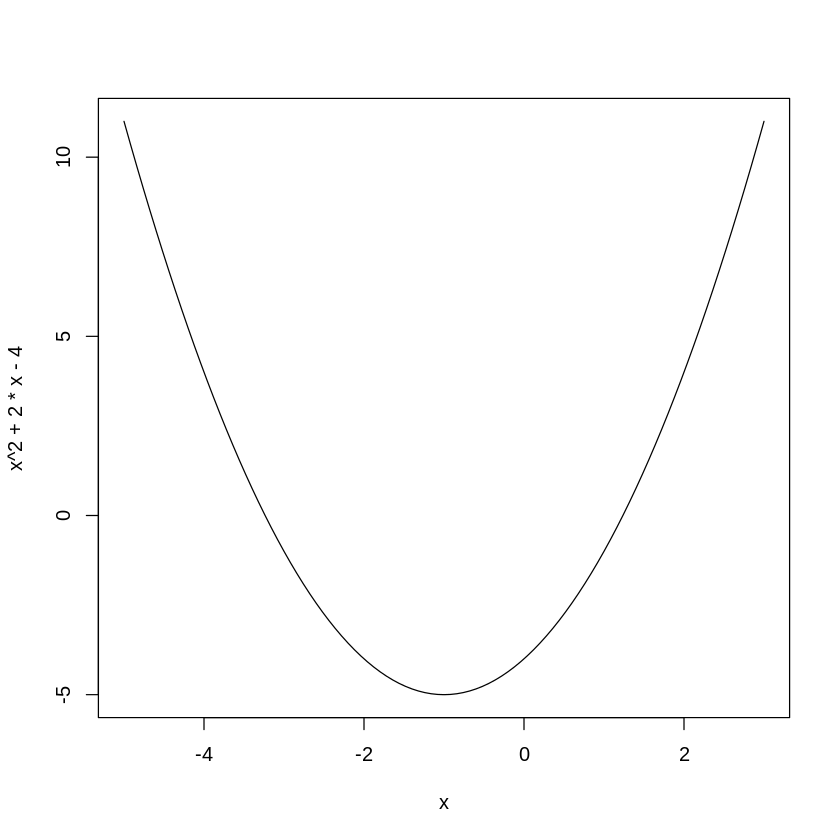

In [54]:
curve(x^2 + 2 * x - 4, -5, 3)

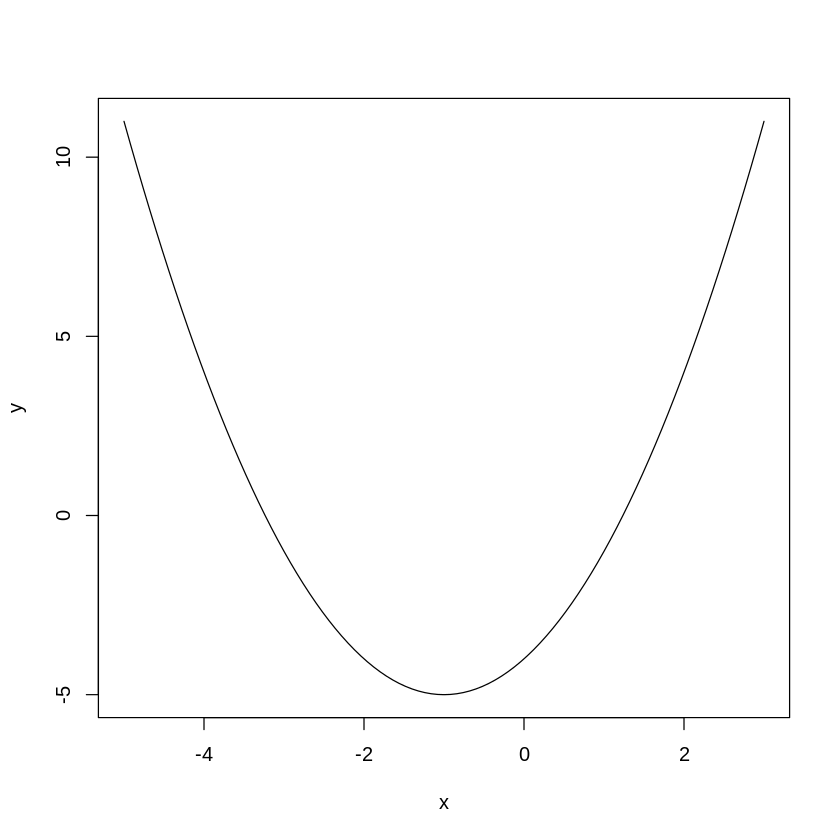

In [55]:
x <- seq(-5, 3, length.out = 101)
y <- x^2 + 2 * x - 4
plot(x, y, "l")

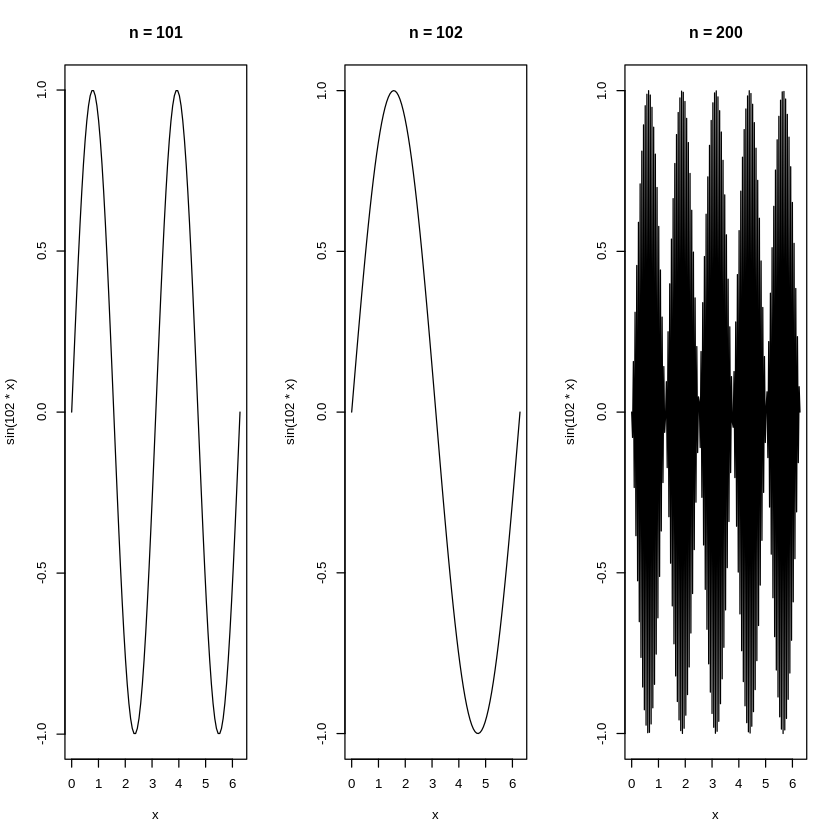

In [56]:
par(mfrow = c(1, 3))
curve(sin(102 * x), 0, 2*pi, main = "n = 101")
curve(sin(102 * x), 0, 2*pi, main = "n = 102", n = 102)
curve(sin(102 * x), 0, 2*pi, main = "n = 200", n = 200)
par(mfrow = c(1, 1))

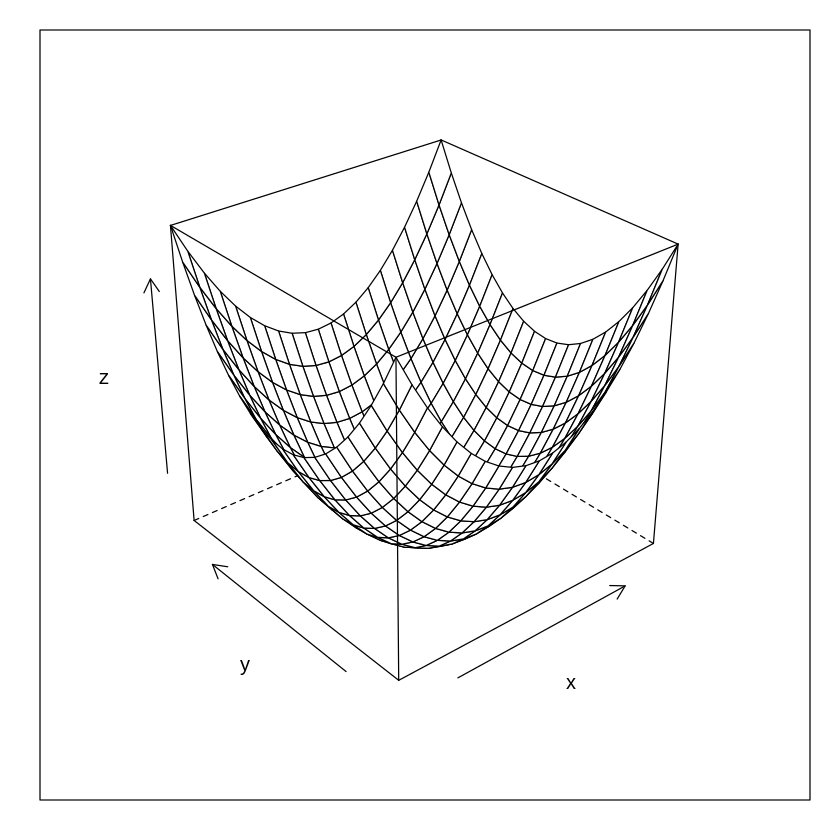

In [57]:
data <- expand.grid(x = seq(-1, 1, 0.1), y = seq(-1, 1, 0.1))
data$z <- data$x^2 + data$y^2
lattice::wireframe(z ~ x + y, data)

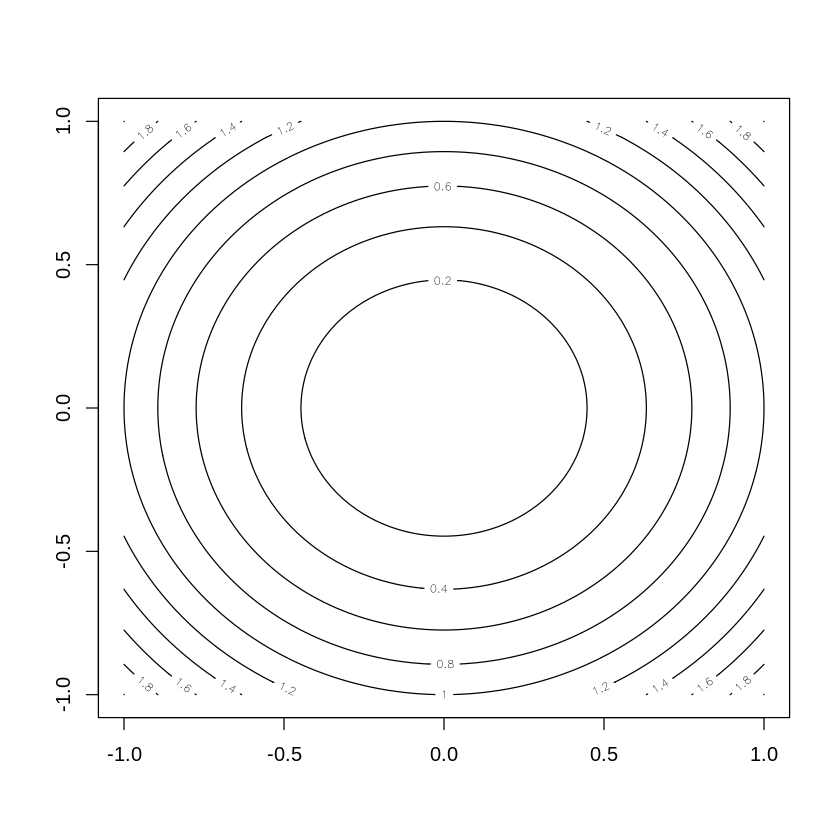

In [58]:
x <- seq(-1, 1, length.out = 100); y <- seq(-1, 1, length.out = 100)
z <- outer(x, y, function(x, y) x^2 + y^2)
contour(x, y, z)

In [59]:
f <- function(x) { 2^x + sin(x) }
uniroot(f, c(-2, 0))

$root
[1] -0.6761814

$f.root
[1] 3.399164e-07

$iter
[1] 6

$init.it
[1] NA

$estim.prec
[1] 6.103516e-05

# 5 論理式




# 6 1次元のデータ

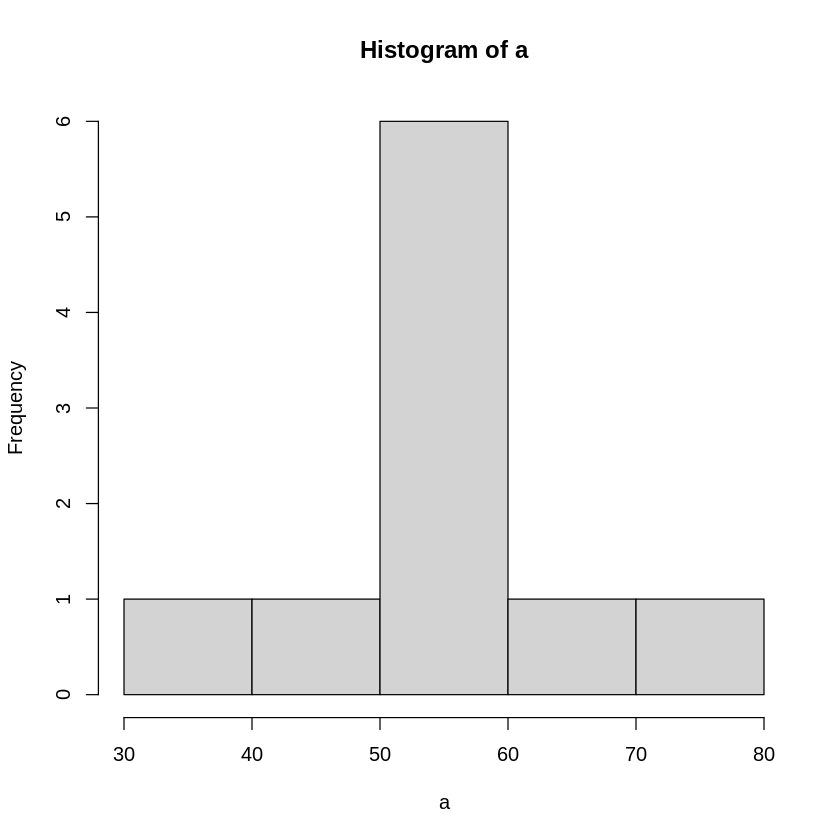

In [60]:
a <- c(36, 43, 53, 55, 56, 56, 57, 60, 61, 73)
b <- c(34, 39, 39, 49, 50, 52, 52, 55, 83, 97)
hist(a)

[1] 1 7 2

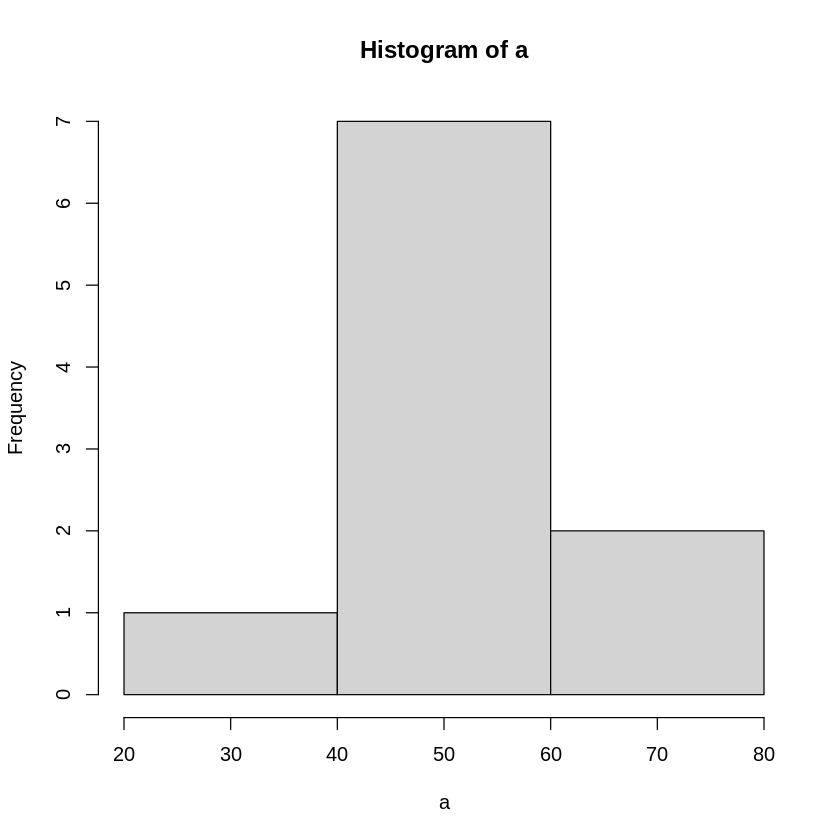

In [61]:
hist(a, seq(20, 80, 20))$counts

In [62]:
x <- c(7, 3, 1, 3, 4, 7, 7, 7, 10, 3)
(f <- table(x))

x
 1  3  4  7 10 
 1  3  1  4  1 

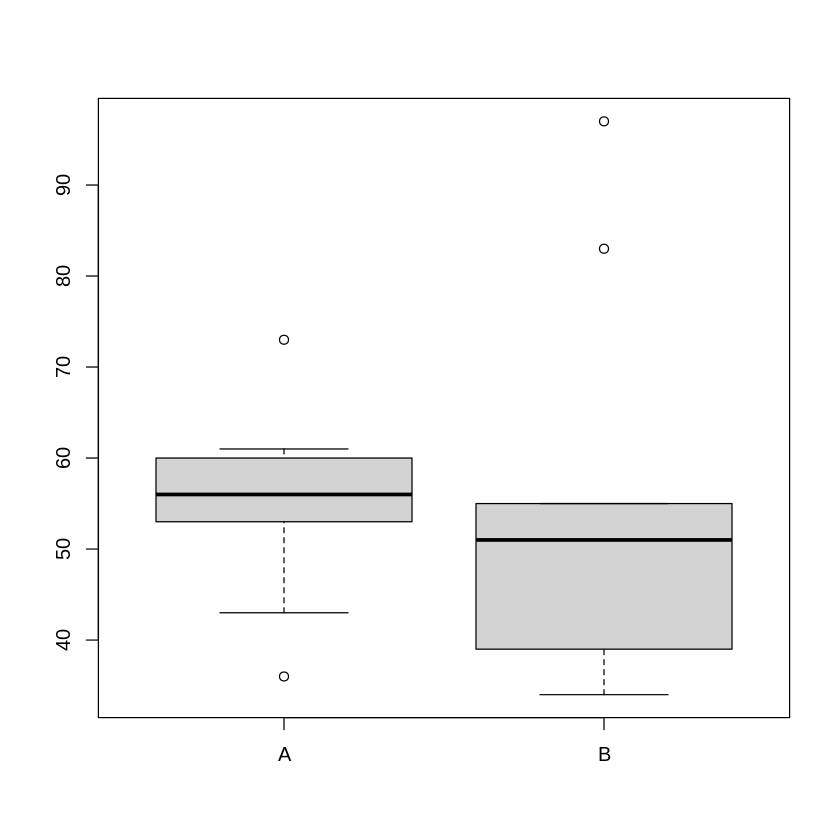

In [63]:
boxplot(a, b, names = c("A", "B"))

In [64]:
a <- c(36, 43, 53, 55, 56, 56, 57, 60, 61, 73)
mean(a)

[1] 55

In [65]:
b <- c(34, 39, 39, 49, 50, 52, 52, 55, 83, 97)
sum(b) / length(b)

[1] 55

In [66]:
mean(a - mean(a))

[1] 0

In [67]:
var(a)

[1] 100

In [68]:
sum((b - mean(b))^2) / (length(b) - 1)

[1] 397.7778

In [69]:
(z <- scale(a))

-1.9
-1.2
-0.2
0.0
0.1
0.1
0.2
0.5
0.6
1.8


In [70]:
c(mean(z), sd(z))

[1] 1.660998e-17 1.000000e+00

In [71]:
(a - mean(a)) / sd(a)

[1] -1.9 -1.2 -0.2  0.0  0.1  0.1  0.2  0.5  0.6  1.8

In [72]:
sd(a) * z + mean(a)

36
43
53
55
56
56
57
60
61
73


In [73]:
10 * z + 50

31
38
48
50
51
51
52
55
56
68


# 7 2次元のデータ

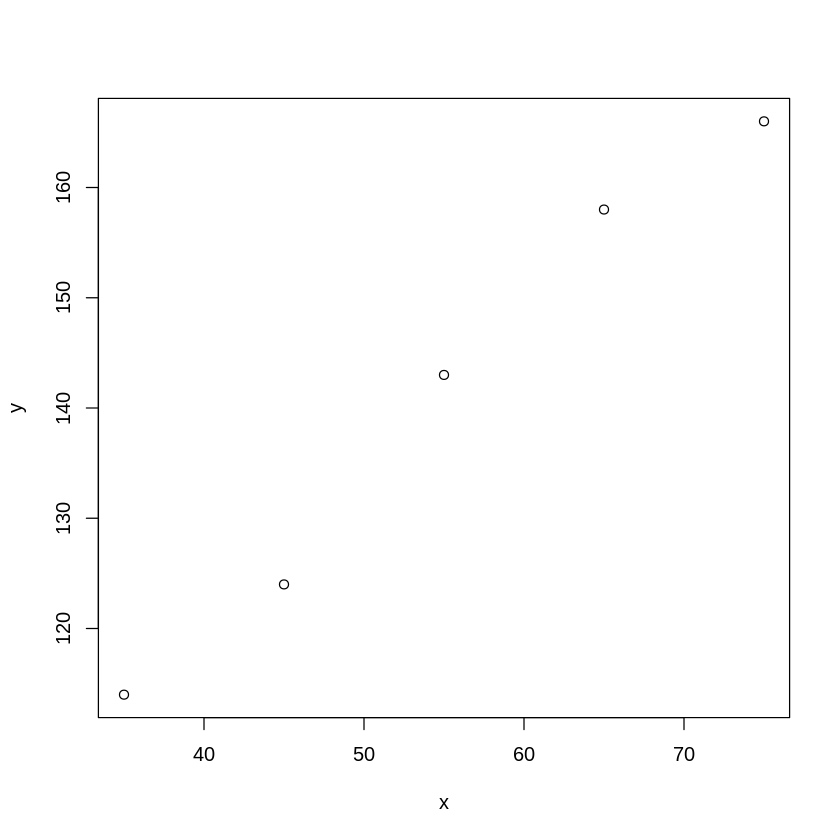

In [74]:
x <- c(35, 45, 55, 65, 75); y <- c(114, 124, 143, 158, 166)
plot(x, y)

In [75]:
x <- c(35, 45, 55, 65, 75); y <- c(114, 124, 143, 158, 166)
cov(x, y)

[1] 345

In [76]:
cov(data.frame(x, y))

,x,y
x,250,345
y,345,484


In [77]:
sum((x - mean(x)) * (y - mean(y))) / (length(x) - 1)

[1] 345

In [78]:
cor(x, y)

[1] 0.9918053

In [79]:
x <- c(35, 45, 55, 65, 75); y <- c(114, 124, 143, 158, 166)
data <- data.frame(x, y)
(model <- lm(y ~ x, data))


Call:
lm(formula = y ~ x, data = data)

Coefficients:
(Intercept)            x  
      65.10         1.38  


In [80]:
predict(model, list(x = 40))

1 
120.3

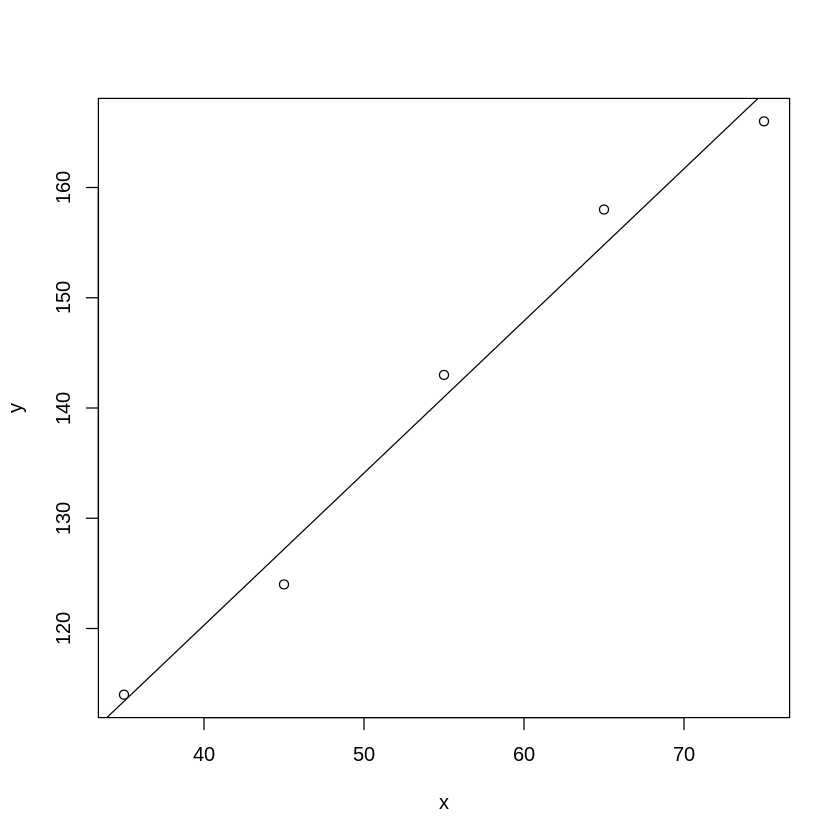

In [81]:
plot(data); abline(model)

In [82]:
a <- cov(x, y) / var(x); b <- mean(y) - a * mean(x)
c(a, b)

[1]  1.38 65.10

[1] 0.8164205

Call:
lm(formula = y1 ~ x1, data = anscombe)

Coefficients:
(Intercept)           x1  
     3.0001       0.5001  



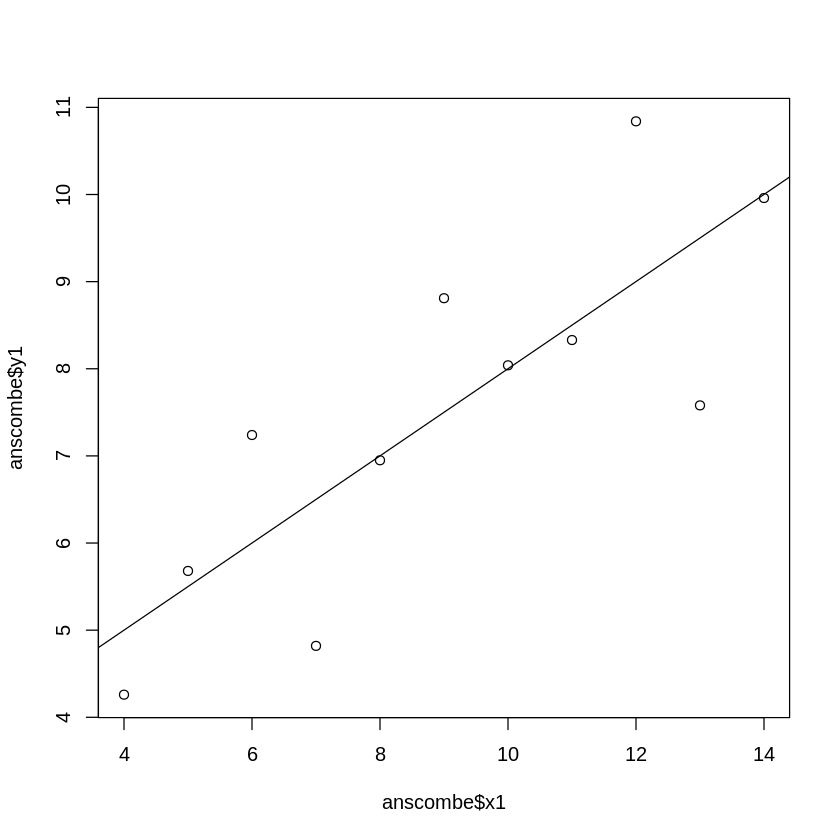

In [83]:
print(cor(anscombe$x1, anscombe$y1))
print(model <- lm(y1 ~ x1, anscombe))
plot(anscombe$x1, anscombe$y1); abline(model)

# 8 確率変数と確率分布

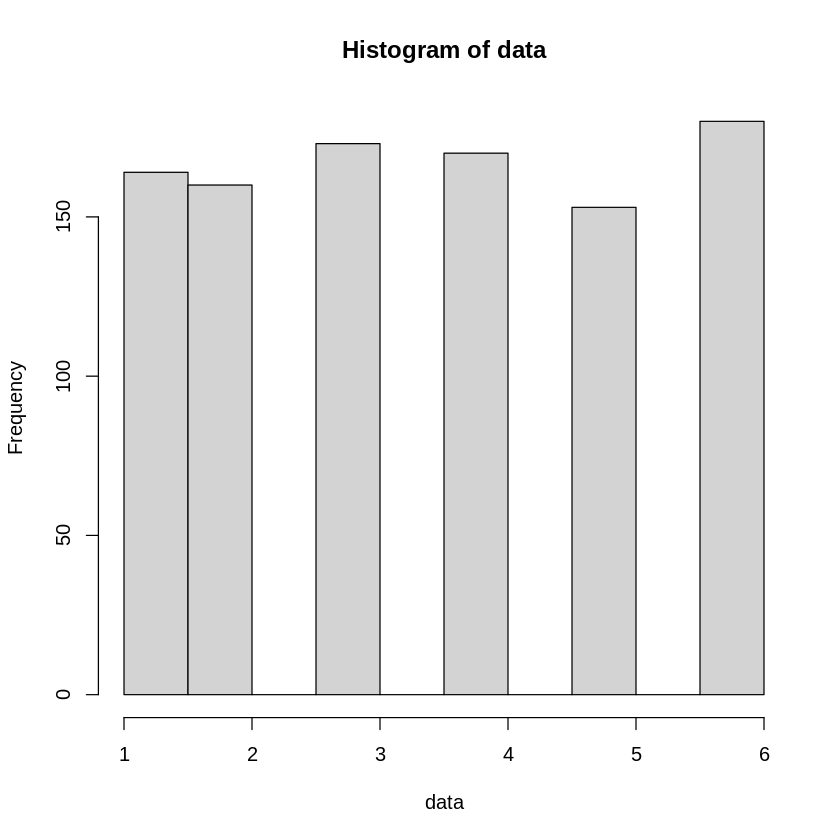

In [84]:
x <- 1:6
data <- sample(x, size = 1000, replace = TRUE)
hist(data) # 結果は割愛

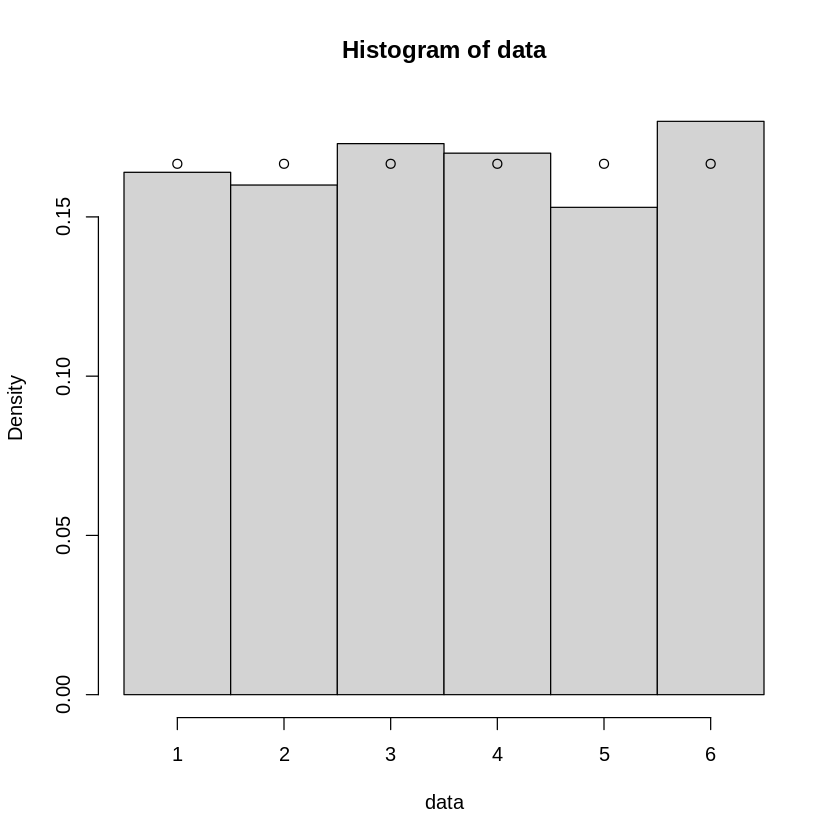

In [85]:
y <- rep(1 / 6, 6) # 確率関数の値
hist(data, breaks = seq(0.5, 6.5), freq = FALSE)
points(x, y)

In [86]:
data <- rbinom(1000, 1, 3 / 10)
table(data)

data
  0   1 
695 305 

In [87]:
dbinom(3, 10, 3 / 10)

[1] 0.2668279

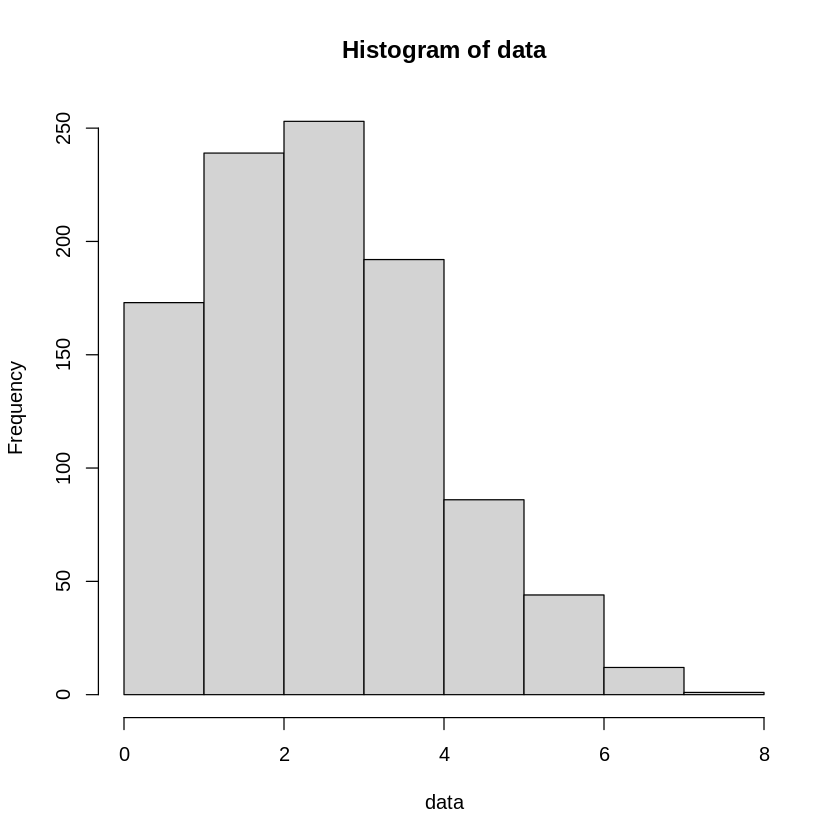

In [88]:
n <- 10; p <- 3 / 10
data <- rbinom(1000, n, p)
hist(data) # 結果は割愛

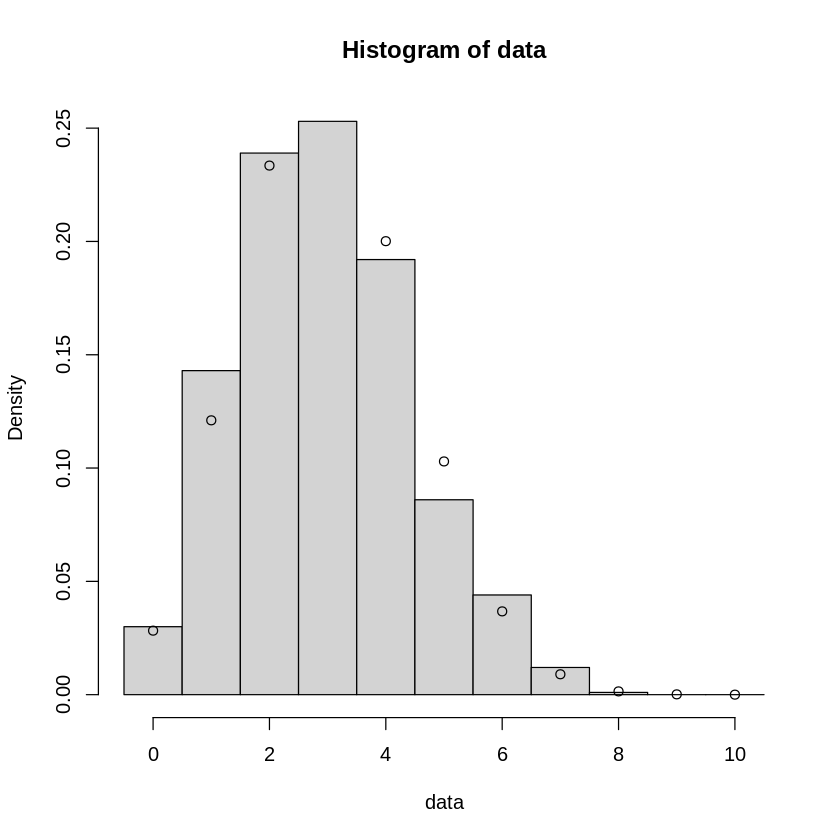

In [89]:
x <- 0:n; y <- dbinom(x, n, p)
hist(data, breaks=seq(-0.5, n + 0.5), freq=FALSE)
points(x, y)

In [90]:
pbinom(3, 10, 3 / 10)

[1] 0.6496107

In [91]:
sum(dbinom(0:3, 10, 3 / 10))

[1] 0.6496107

In [92]:
F <- function(x) { punif(x, 0, 360) }
c(F(200), F(150), F(200) - F(150))

[1] 0.5555556 0.4166667 0.1388889

In [93]:
f <- function(x) { 1 / 360 }
integrate(Vectorize(f), 150, 200)

0.1388889 with absolute error < 1.5e-15

In [94]:
D(expression(x / 360), "x")

1/360

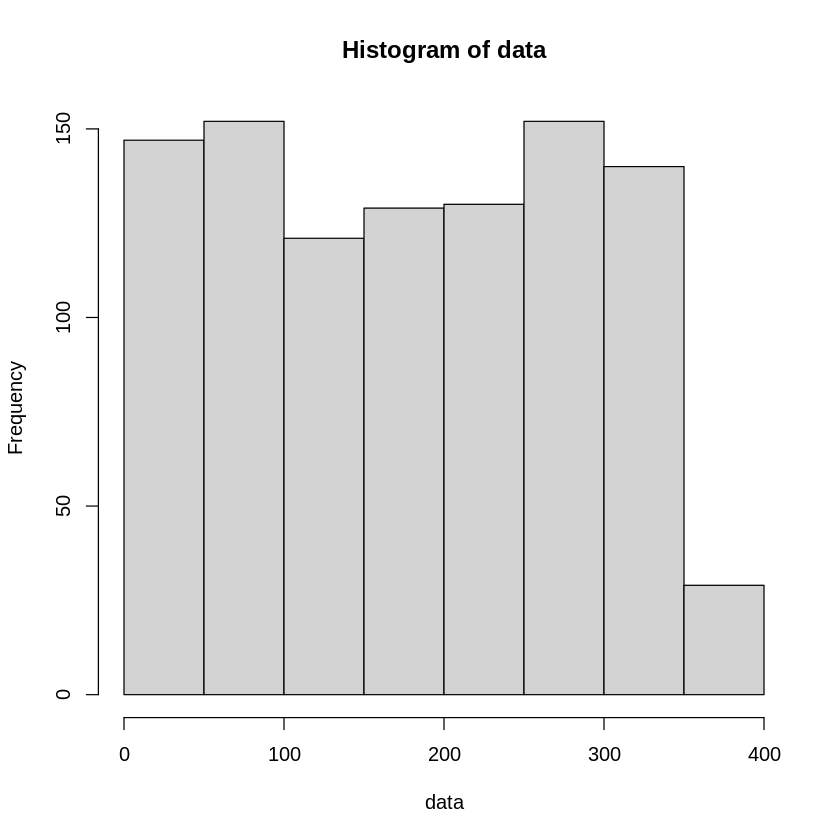

In [95]:
data <- runif(1000, 0, 360)
hist(data) # 結果は割愛

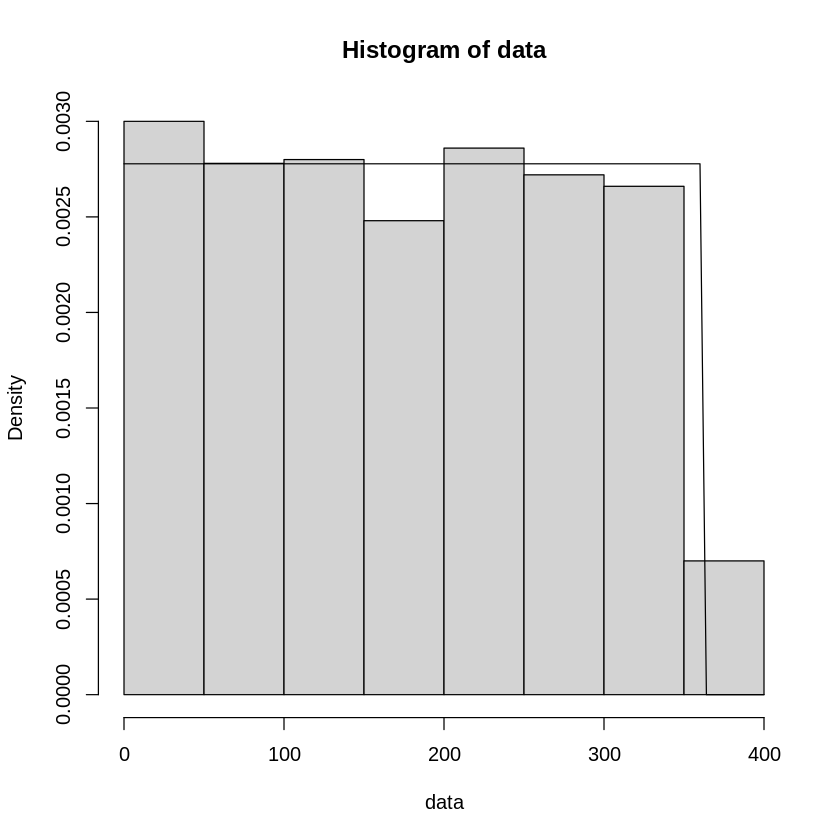

In [96]:
data <- runif(1000, 0, 360)
hist(data, freq = FALSE)
curve(dunif(x, 0, 360), add = TRUE)

In [97]:
pnorm(6 + 3 * 2, 6, 2) - pnorm(6 - 3 * 2, 6, 2)

[1] 0.9973002

In [98]:
f <- function(x) { dnorm(x, 6, 2) }
integrate(Vectorize(f), 6 - 3 * 2, 6 + 3 * 2)

0.9973002 with absolute error < 9.3e-07

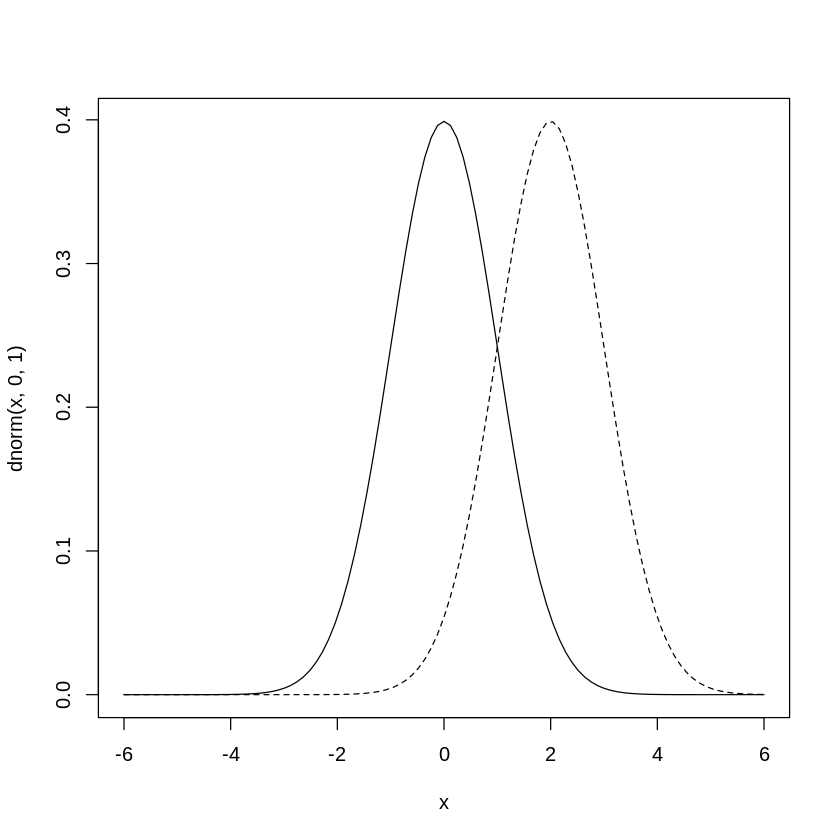

In [99]:
curve(dnorm(x, 0, 1), -6, 6)
curve(dnorm(x, 2, 1), -6, 6, lty = 2, add = TRUE) # 破線

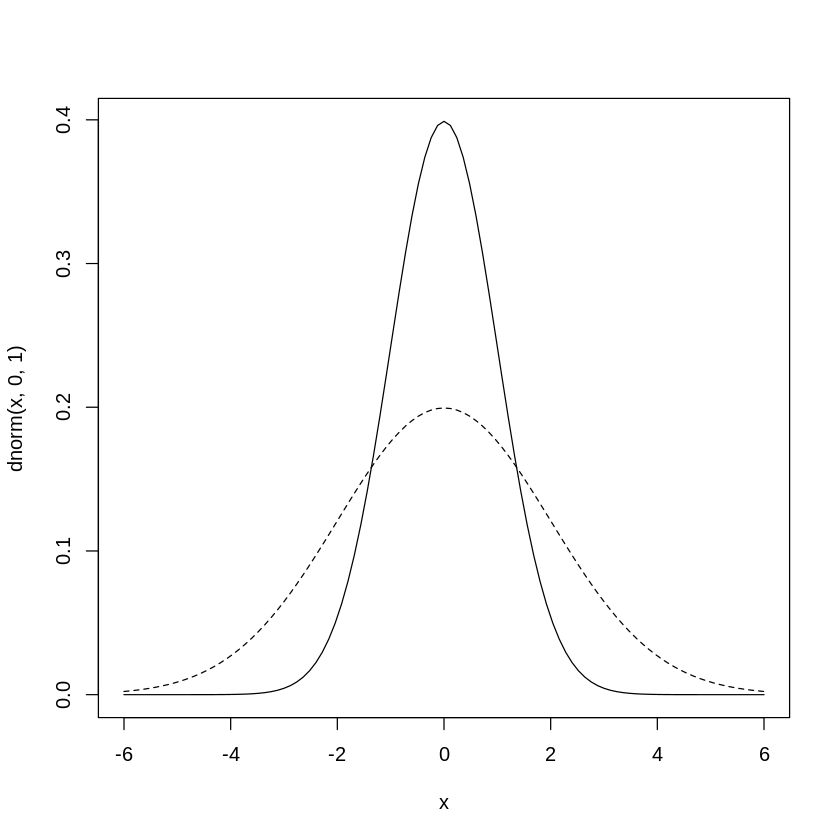

In [100]:
curve(dnorm(x, 0, 1), -6, 6)
curve(dnorm(x, 0, 2), -6, 6, lty = 2, add = TRUE) # 破線

In [101]:
Xs <- c(0, 100, 1000, 10000); Ps <- c(0.9, 0.08, 0.015, 0.005)
data <- sample(Xs, 1000, replace = TRUE, prob = Ps)
table(data)

data
    0   100  1000 10000 
  911    75    12     2 

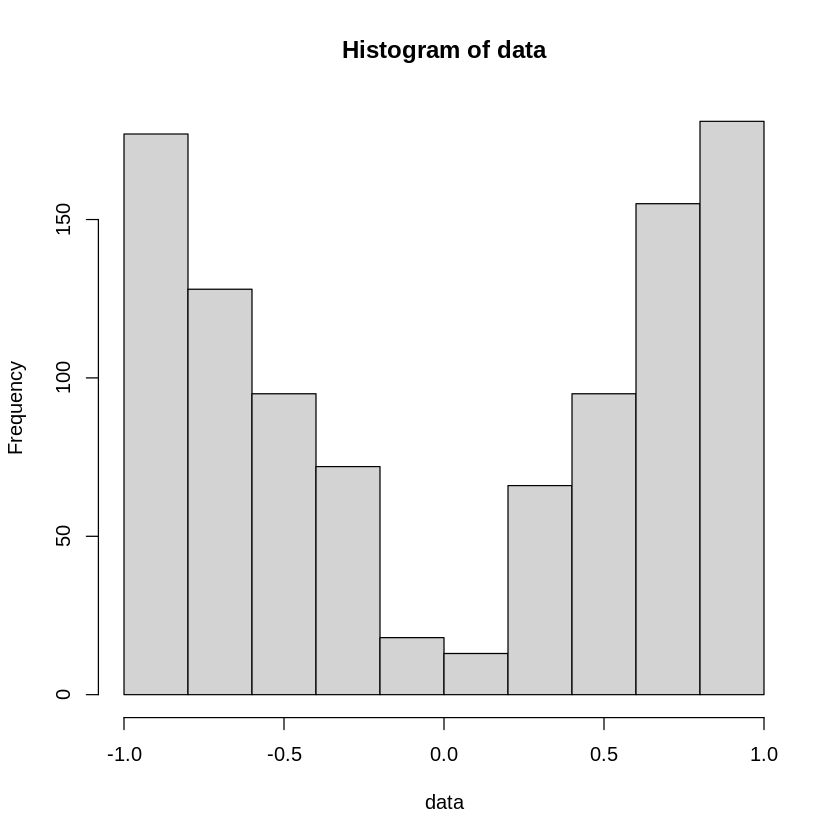

In [102]:
r <- function() {
  y <- runif(1)
  ifelse(y <= 1 / 2, -sqrt(1 - 2 * y), sqrt(-1 + 2 * y))
}
data <- replicate(1000, r())
hist(data)

In [103]:
Xs <- c(0, 100, 1000, 10000); Ps <- c(0.9, 0.08, 0.015, 0.005)
sum(Xs * Ps)

[1] 73

In [104]:
mean(sample(Xs, 500000, replace = TRUE, prob = Ps))

[1] 73.3074

In [105]:
f <- function(x) { abs(x) }
g <- function(x) { x * f(x) }
integrate(Vectorize(g), -1, 1)

0 with absolute error < 7.4e-15

In [106]:
sum((Xs - sum(Xs * Ps))^2 * Ps)

[1] 510471

In [107]:
f <- function(x) { abs(x) }
g <- function(x) { x * f(x) }
u <- integrate(Vectorize(g), -1, 1)$value # Xの平均
h <- function(x) { (x - u)^2 * f(x) }
integrate(Vectorize(h), -1, 1)

0.5 with absolute error < 5.6e-15

# 9 多次元の確率分布

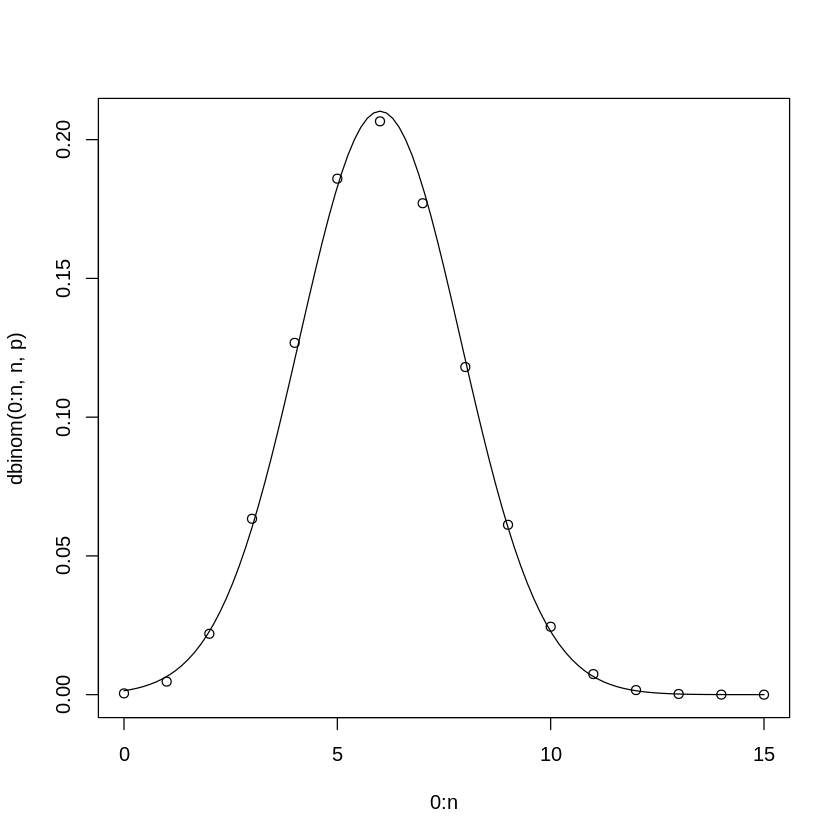

In [108]:
n <- 15; p <- 4 / 10; mu <- n * p; sigma <- sqrt(n * p * (1 - p))
plot(0:n, dbinom(0:n, n, p))
curve(dnorm(x, mu, sigma), add = TRUE)

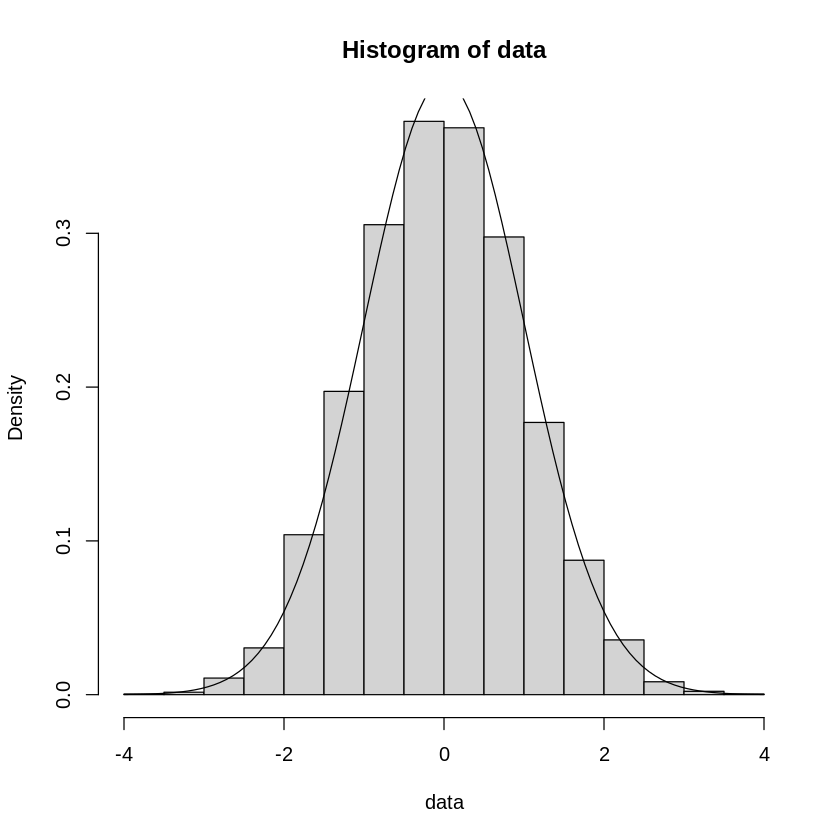

In [109]:
data <- replicate(10000, sum(runif(12)) - 6)
hist(data, freq = FALSE)
curve(dnorm(x), add = TRUE)

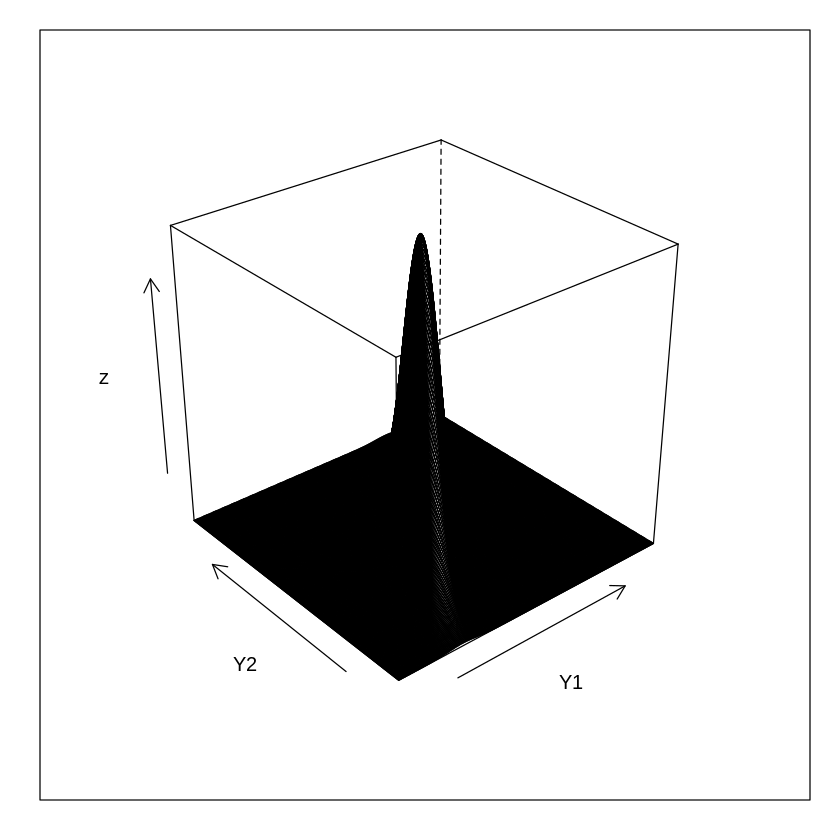

In [110]:
mu = c(3, 6); Sigma = rbind(c(5, 7), c(7, 13))
Y1 <- seq(-8, 14, by = 0.1); Y2 <- seq(-5, 17, by = 0.1)
data <- expand.grid(Y1 = Y1, Y2 = Y2)
data$z = mnormt::dmnorm(data, mu, Sigma)
lattice::wireframe(z ~ Y1 + Y2, data)

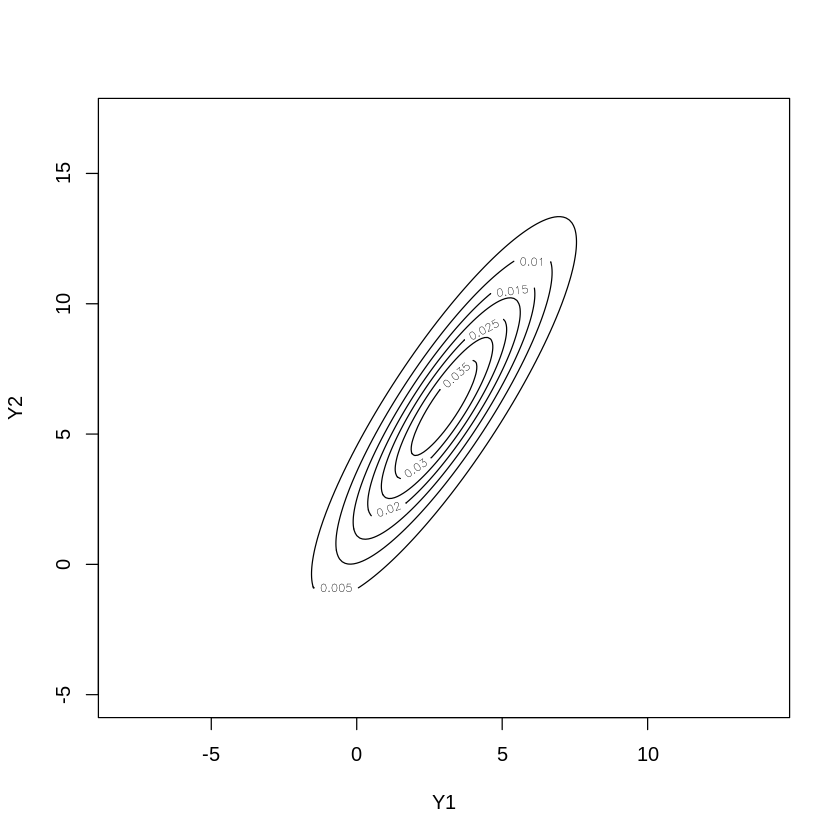

In [111]:
contour(Y1, Y2, matrix(data$z, nrow = length(Y1)), xlab = 'Y1', ylab = 'Y2')

# 10 推測統計

In [112]:
mu <- 2; sigma <- 3;
data1 <- replicate(10000, mean(rnorm(5, mu, sigma)))
data2 <- replicate(10000, mean(rnorm(50, mu, sigma)))
rbind(c(mean(data1), var(data1)), c(mean(data2), var(data2)))

2.000663,1.7959801
1.997924,0.1795038


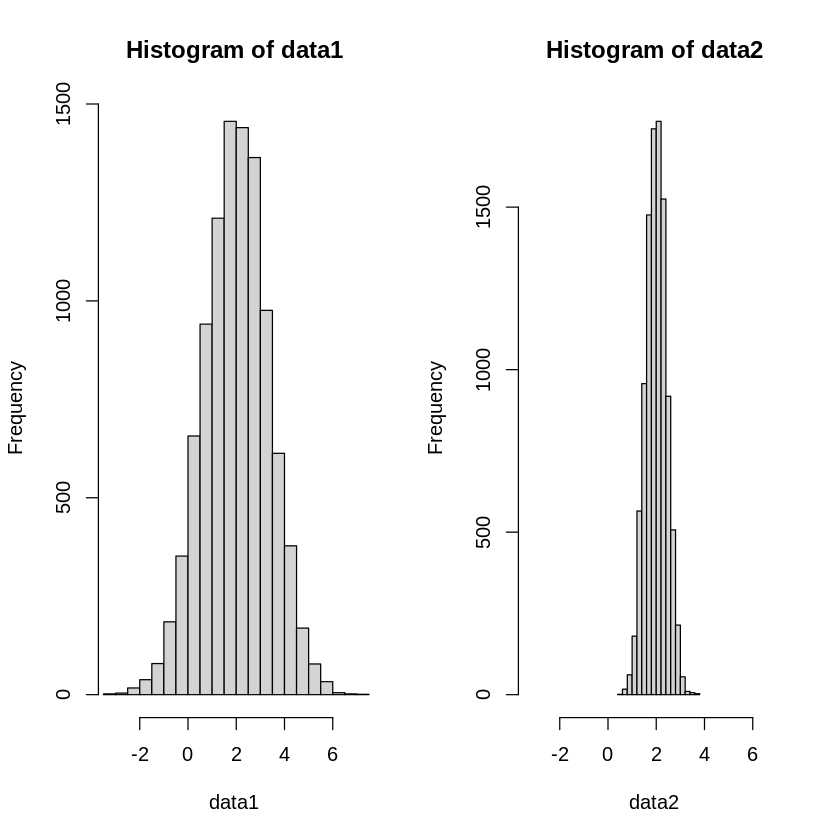

In [113]:
xlim <- c(min(c(data1, data2)), max(c(data1, data2))) # 横軸を合わせる．
par(mfrow = c(1, 2))
hist(data1, xlim = xlim); hist(data2, xlim = xlim)
par(mfrow = c(1, 1))

In [114]:
mu <- 2; sigma <- 3;
data1 <- replicate(10000, var(rnorm(5, mu, sigma)))
data2 <- replicate(10000, var(rnorm(50, mu, sigma)))
rbind(c(mean(data1), var(data1)), c(mean(data2), var(data2)))

9.098105,40.289253
8.990055,3.360953


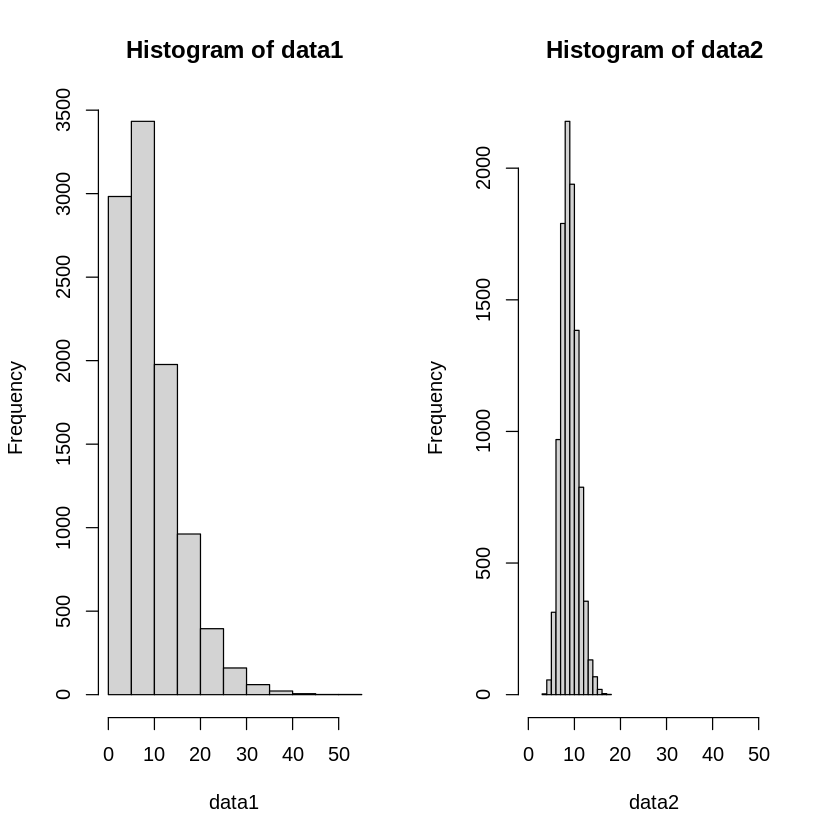

In [115]:
xlim <- c(min(c(data1, data2)), max(c(data1, data2))) # 横軸を合わせる．
par(mfrow = c(1, 2))
hist(data1, xlim = xlim); hist(data2, xlim = xlim)
par(mfrow = c(1, 1))

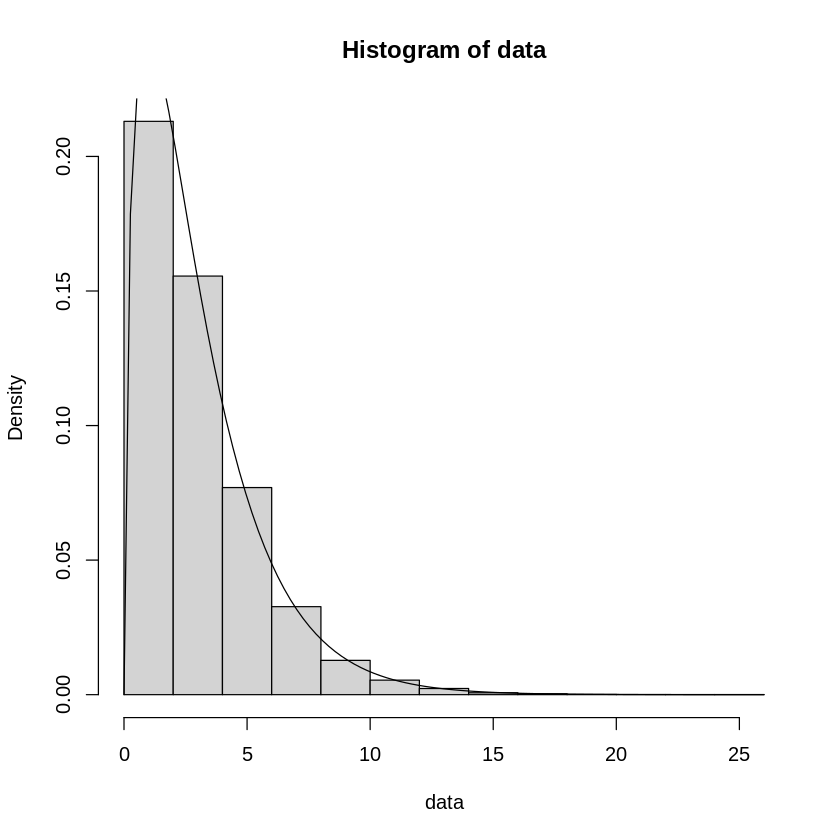

In [116]:
n <- 4; mu <- 5; sigma <- 7
f <- function(x) { (n - 1) * var(x) / sigma^2 }
data <- replicate(10000, f(rnorm(n, mu, sigma)))
hist(data, freq = FALSE)
curve(dchisq(x, n - 1), add = TRUE)

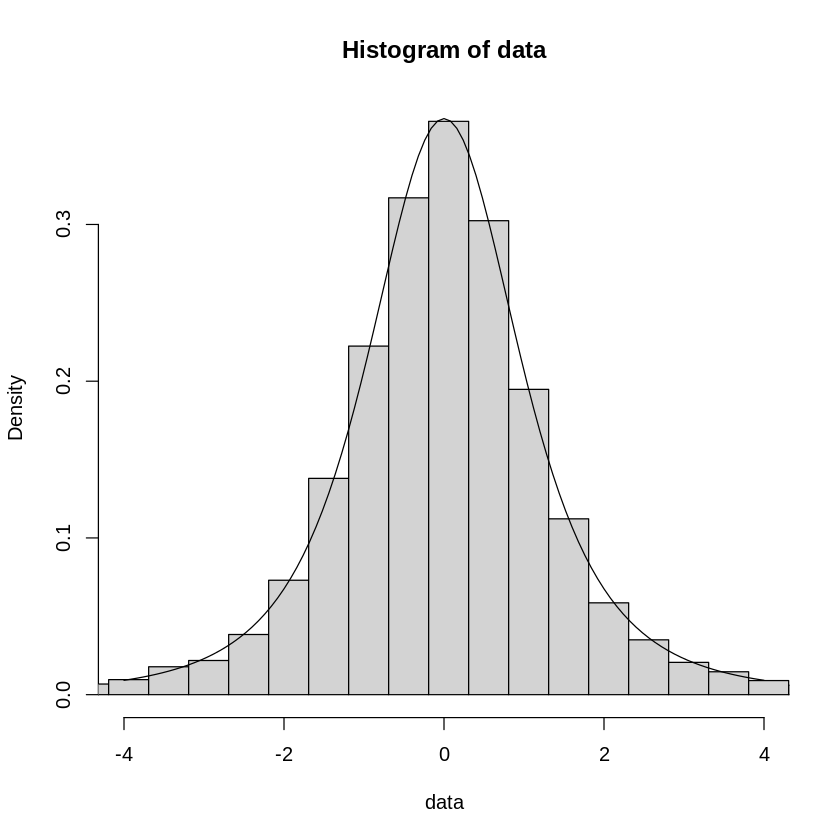

In [117]:
n <- 4; mu <- 5; sigma <- 7
t <- function(x) { (mean(x) - mu) / sqrt(var(x) / n) }
data <- replicate(10000, t(rnorm(n, mu, sigma)))
hist(data, freq = FALSE, xlim = c(-4, 4),
     breaks = seq(1.1 * min(data), 1.1 * max(data), 0.5))
curve(dt(x, n - 1), add = TRUE)

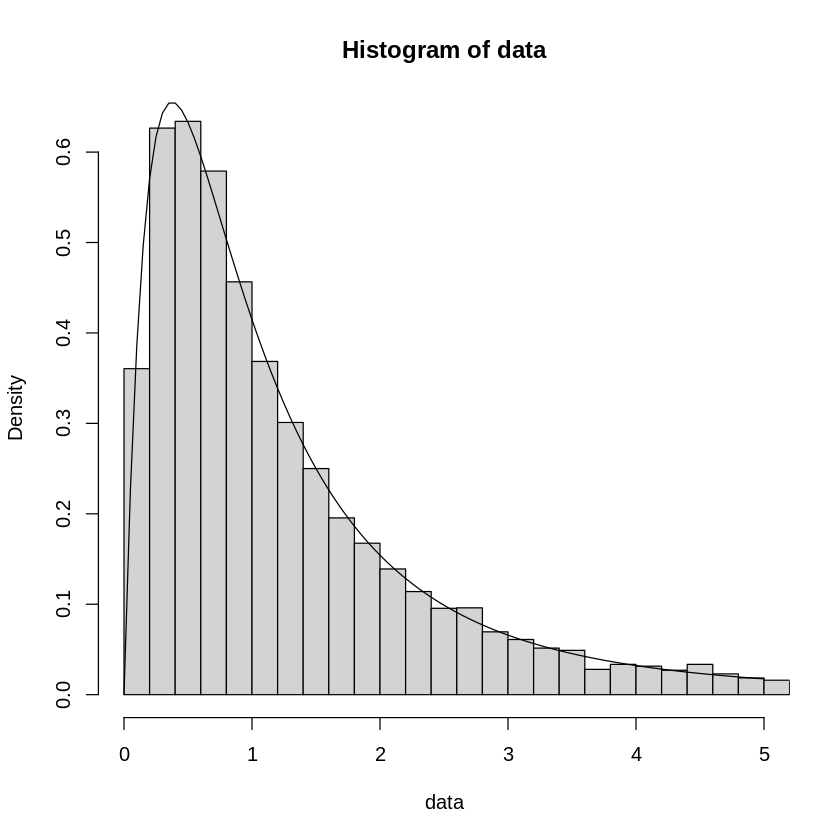

In [118]:
m <- 5; muX <- 2; sigmaX <- 3; n <- 7; muY <- 3; sigmaY <- 2;
f <- function(x, y) { (var(x) / sigmaX^2) / (var(y) / sigmaY^2) }
data <- replicate(10000, f(rnorm(m, muX, sigmaX), rnorm(n, muX, sigmaY)))
hist(data, freq = FALSE, xlim = c(0, 5),
     breaks = seq(0, 1.2 * max(data), 0.2))
curve(df(x, m - 1, n - 1), add = TRUE)

In [119]:
n <- 15; p0 <- 4 / 10; exactci::binom.exact(2, n, p0, tsmethod = "minlike")
# p-valueのところにP値が表示される．


	Exact two-sided binomial test (sum of minimum likelihood method)

data:  2 and n
number of successes = 2, number of trials = 15, p-value = 0.03646
alternative hypothesis: true probability of success is not equal to 0.4
95 percent confidence interval:
 0.0242 0.3967
sample estimates:
probability of success 
             0.1333333 


In [120]:
exactci::binom.exact(2, n, p0, tsmethod = "minlike", alternative = "less")


	Exact one-sided binomial test

data:  2 and n
number of successes = 2, number of trials = 15, p-value = 0.02711
alternative hypothesis: true probability of success is less than 0.4
95 percent confidence interval:
 0.0000000 0.3634418
sample estimates:
probability of success 
             0.1333333 


In [121]:
n <- 15; p0 <- 4 / 10; mu0 <- n * p0; sigma0 <- sqrt(n * p0 * (1 - p0))
2 * pnorm(2, mu0, sigma0)

[1] 0.03501498

In [122]:
alpha <- 5 / 100; qnorm(c(alpha / 2, 1 - alpha / 2), mu0, sigma0)

[1] 2.28123 9.71877

In [123]:
x <- c(24.2, 25.3, 26.2, 25.7, 24.4, 25.1, 25.6); mu0 <- 25
t.test(x, mu = mu0)


	One Sample t-test

data:  x
t = 0.79277, df = 6, p-value = 0.4581
alternative hypothesis: true mean is not equal to 25
95 percent confidence interval:
 24.55289 25.87568
sample estimates:
mean of x 
 25.21429 


In [124]:
m <- mean(x); s2 <- var(x); n <- length(x)
t <- (m - mu0) / sqrt(s2 / n); c <- pt(t, n - 1)
2 * min(c, 1 - c)

[1] 0.4581012

In [125]:
alpha <- 5 / 100
qt(c(alpha / 2, 1 - alpha / 2), n - 1)

[1] -2.446912  2.446912

In [126]:
t.test(x)


	One Sample t-test

data:  x
t = 93.283, df = 6, p-value = 1.023e-10
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 24.55289 25.87568
sample estimates:
mean of x 
 25.21429 


In [127]:
x <- c(25, 24, 25, 26); y <- c(23, 18, 22, 28, 17, 25, 19, 16)
t.test(x, y, alternative = "greater", var.equal = FALSE)


	Welch Two Sample t-test

data:  x and y
t = 2.5923, df = 7.9878, p-value = 0.01602
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 1.130088      Inf
sample estimates:
mean of x mean of y 
       25        21 


In [128]:
x <- c(25, 24, 25, 26); y <- c(23, 18, 22, 28, 17, 25, 19, 16)
var.test(x, y)


	F test to compare two variances

data:  x and y
F = 0.037634, num df = 3, denom df = 7, p-value = 0.02121
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.006389739 0.550380458
sample estimates:
ratio of variances 
        0.03763441 


In [129]:
f <- var(x) / var(y); m <- length(x); n <- length(y);
c <- pf(f, m - 1, n - 1)
c(f, 2 * min(c, 1 - c))

[1] 0.03763441 0.02121497

In [130]:
alpha = 0.05
c(qf(c(alpha / 2, 1 - alpha / 2), m - 1, n - 1))

[1] 0.0683789 5.8898192

# 11 線形回帰分析

In [131]:
data <- data.frame(
  x1 = c(1, 1, 2, 3), x2 = c(2, 3, 5, 7), y = c(3, 6, 3, 6))
model <- lm(y ~ x1 + x2, data)
summary(model)
# Call:
# lm(formula = y ~ x1 + x2, data = data.frame(x1, x2, y))
#
# Residuals:
#          1          2          3          4
#  2.776e-16  1.000e+00 -2.000e+00  1.000e+00
#
# Coefficients:
#             Estimate Std. Error t value Pr(>|t|)
# (Intercept)    3.000      3.000   1.000    0.500
# x1            -4.000      7.681  -0.521    0.694
# x2             2.000      3.317   0.603    0.655
#
# Residual standard error: 2.449 on 1 degrees of freedom
# Multiple R-squared:  0.3333,  Adjusted R-squared:     -1
# F-statistic:  0.25 on 2 and 1 DF,  p-value: 0.8165


Call:
lm(formula = y ~ x1 + x2, data = data)

Residuals:
         1          2          3          4 
-3.331e-16  1.000e+00 -2.000e+00  1.000e+00 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)    3.000      3.000   1.000    0.500
x1            -4.000      7.681  -0.521    0.694
x2             2.000      3.317   0.603    0.655

Residual standard error: 2.449 on 1 degrees of freedom
Multiple R-squared:  0.3333,	Adjusted R-squared:     -1 
F-statistic:  0.25 on 2 and 1 DF,  p-value: 0.8165


In [132]:
predict(model, list(x1 = 1.5, x2 = 4))

1 
5

In [133]:
x1 <- c(1, 3, 6, 10); y <- c(7, 1, 6, 14)
L <- function(b) {
  e <- y - (b[1] + b[2] * x1)
  sum(e * e) # 内積
}
optim(c(0, 0), L)

$par
[1] 2.0014641 0.9997503

$value
[1] 40

$counts
function gradient 
      85       NA 

$convergence
[1] 0

$message
NULL

In [134]:
data <- data.frame(
  x1 = c(1, 1, 2, 3), x2 = c(2, 3, 5, 7), y = c(3, 6, 3, 6))
X <- model.matrix(y ~ ., data); y <- data$y
solve(t(X) %*% X) %*% t(X) %*% y

(Intercept),3
x1,-4
x2,2


In [135]:
MASS::ginv(X) %*% y

3
-4
2


In [136]:
data <- data.frame(
  x1 = c(1, 1, 2, 3), x2 = c(2, 3, 5, 7), y = c(3, 6, 3, 6))
model <- lm(y ~ x1 + x2, data)
summary(model)$r.squared

[1] 0.3333333

In [137]:
summary(model)$adj.r.squared

[1] -1

In [138]:
data <- data.frame(x1 = c(1, 3, 6, 10), y = c(7, 1, 6, 14))
y <- data$y; X <- model.matrix(y ~ x1, data)
yh <- X %*% MASS::ginv(X) %*% y
eh <- y - yh; fh <- yh - mean(y); g <- y - mean(y)
(R2 <- 1 - sum(eh^2) / sum(g^2))

[1] 0.5348837

In [139]:
c(all.equal(mean(eh), 0),                             # 特徴1
  all.equal(mean(yh), mean(y)),                       # 特徴2
  all.equal(sum(g * g), sum(fh * fh) + sum(eh * eh)), # 特徴3
  all.equal(R2, sum(fh * fh) / sum(g * g)),           # 特徴4
  all.equal(R2, cor(y, yh[, 1])^2),                   # 特徴5
  0 <= R2 & R2 <= 1,                                  # 特徴6
  all.equal(cor(y, yh[, 1]), cor(y, data$x1)))        # 特徴7

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [140]:
data <- data.frame(
  x1 = c(1, 1, 2, 3), x2 = c(2, 3, 5, 7), y = c(3, 6, 3, 6))
model <- lm(y ~ x1 + x2, data)
sigma(model)^2

[1] 6

In [141]:
data <- data.frame(
  x1 = c(1, 1, 2, 3), x2 = c(2, 3, 5, 7), y = c(3, 6, 3, 6))
model <- lm(y ~ ., data); n <- nrow(data); p <- ncol(data); r <- p - 1
1 - pf(summary(model)$fstatistic, r, n - p)

value     numdf     dendf 
0.8164966 0.4472136 0.5773503

In [142]:
data <- data.frame(x1 = c(35, 45, 55, 65, 75),
                   y = c(114, 124, 143, 158, 166))
model <- lm(y ~ x1, data); level <- 0.95
(interval <- confint(model, level = level))

,2.5 %,97.5 %
(Intercept),46.551497,83.648503
x1,1.053379,1.706621


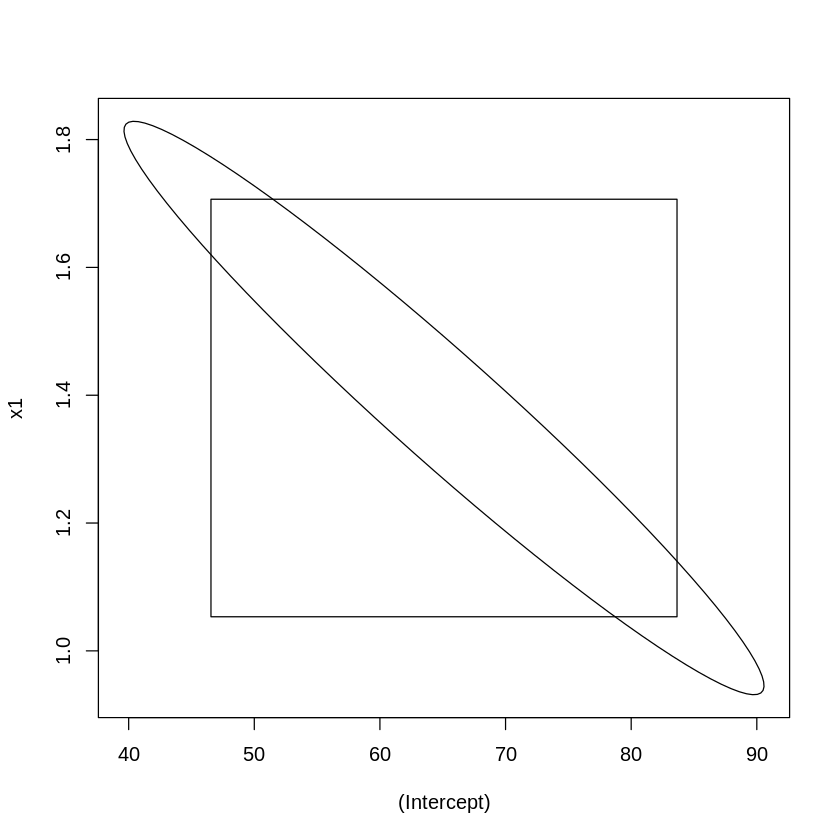

In [143]:
plot(ellipse::ellipse(model, level = level), type = "l")
do.call(rect, as.list(interval))

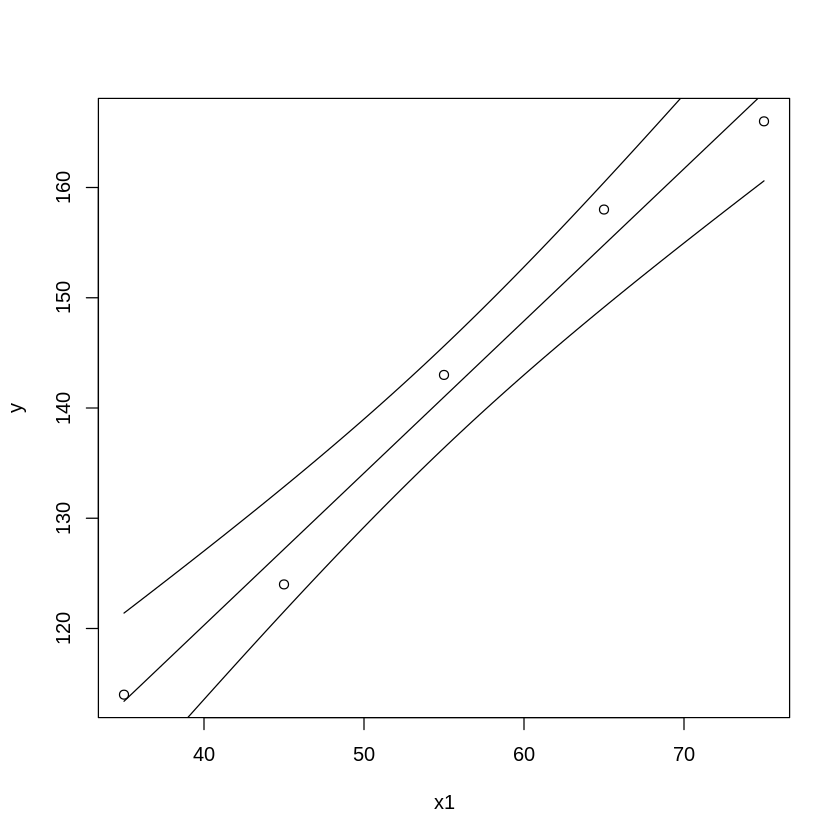

In [144]:
data <- data.frame(x1 = c(35, 45, 55, 65, 75),
                   y = c(114, 124, 143, 158, 166))
model <- lm(y ~ x1, data)
x1 <- seq(35, 75, length.out = 100)
ci <- predict(model, data.frame(x1), level = 0.95, interval = "confidence")
plot(data)
lines(x1, ci[, "fit"], type='l')
lines(x1, ci[, "lwr"], type='l')
lines(x1, ci[, "upr"], type='l')

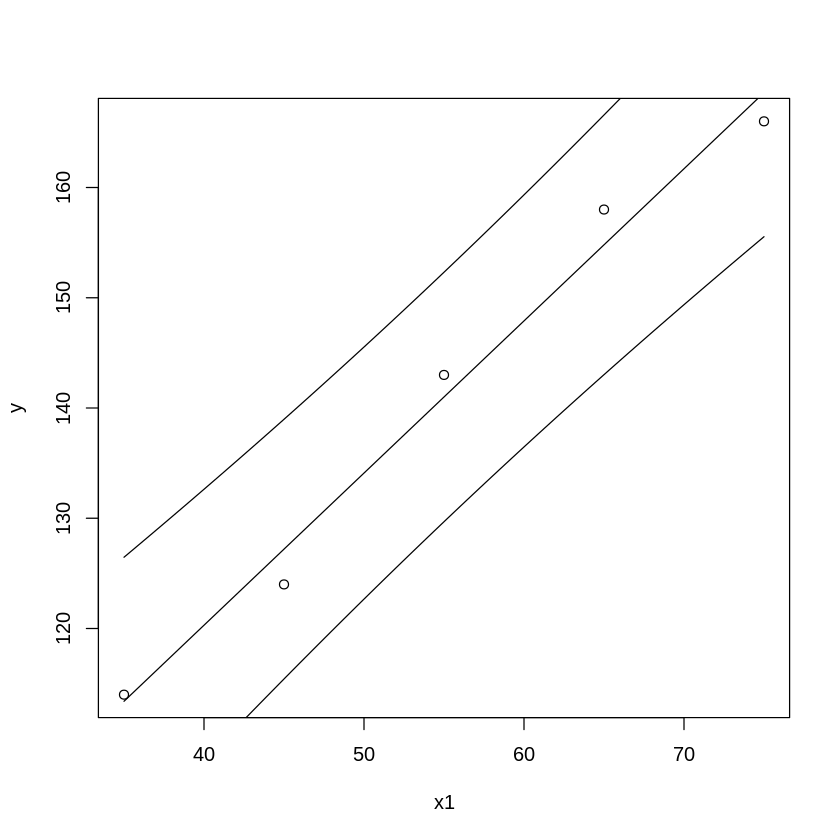

In [145]:
ci <- predict(model, data.frame(x1), level = 0.95, interval = "prediction")
plot(data)
lines(x1, ci[, "fit"], type='l')
lines(x1, ci[, "lwr"], type='l')
lines(x1, ci[, "upr"], type='l')

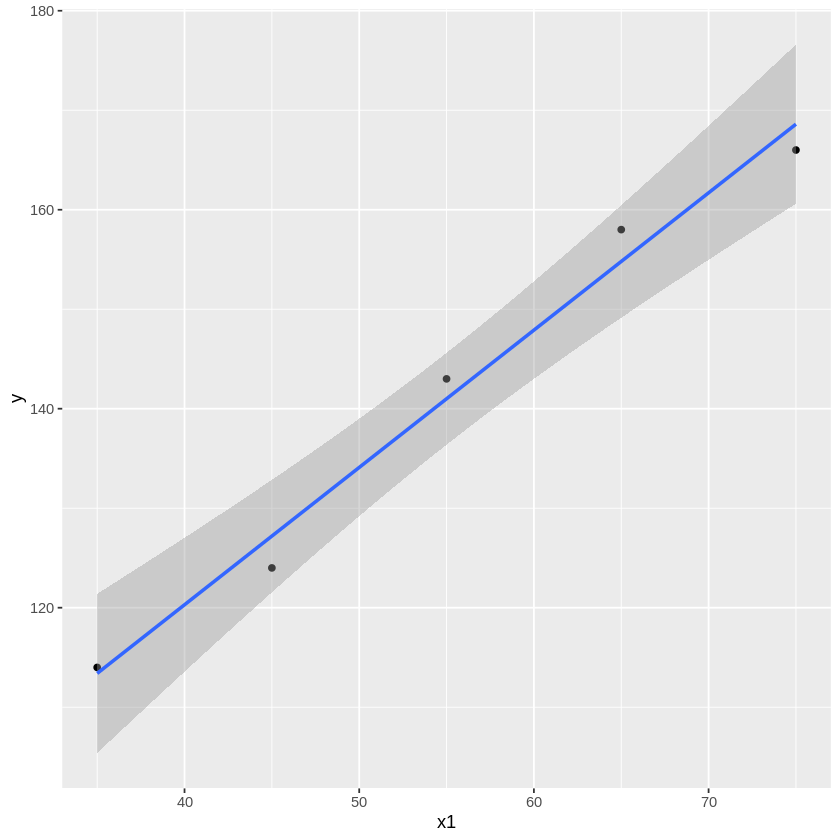

In [146]:
library(ggplot2)
ggplot(data, aes(x1, y)) + geom_point() +
  stat_smooth(formula = y ~ x, method = "lm", level = 0.95)

# 12 関数の極限と連続性




# 13 微分




# 14 積分

In [147]:
f <- function(x) { -x^2 + 4 * x + 1 }
integrate(f, 1, 4)

12 with absolute error < 1.3e-13

# 15 多変数関数の微分積分




# 16 ベクトル

In [148]:
a <- c(1/10 + 2/10, 1/10 + 2/10 - 3/10); b <- c(3/10, 0)
all.equal(a, b)

[1] TRUE

In [149]:
100 * c(1, 2) + 10 * c(3, 1)

[1] 130 210

In [150]:
a <- c(3, 4)
norm(a, type = "2")

[1] 5

In [151]:
a = c(3, 4)
a / norm(a, type = "2")

[1] 0.6 0.8

In [152]:
a <- c(1, 0); b <- c(1, 1)
acos(sum(a * b) / (norm(a, type = "2") * norm(b, type = "2")))

[1] 0.7853982

# 17 行列

In [153]:
(A <- rbind(c(1, 2, 0), c(0, 3, 4)))

1,2,0
0,3,4


In [154]:
(A <- cbind(c(1, 0), c(2, 3), c(0, 4)))

1,2,0
0,3,4


In [155]:
x <- c(5, 7); diag(x, 2)
# diag(x)は非推奨．x <- c(n)（xの要素が一つ）のときに，n行n列の単位行列になる．

5,0
0,7


In [156]:
isSymmetric(rbind(c(1, 2), c(2, 3)))

[1] TRUE

In [157]:
(A = rbind(c(11, 12, 13), c(21, 22, 23), c(31, 32, 33)))

11,12,13
21,22,23
31,32,33


In [158]:
A[1:2, 1:2, drop = FALSE] # ここでは「, drop = FALSE」は省略可．

11,12
21,22


In [159]:
A[, 3]

[1] 13 23 33

In [160]:
A[, 3, drop = FALSE]

13
23
33


In [161]:
A[2, ]

[1] 21 22 23

In [162]:
A[2, , drop = FALSE]

21,22,23


In [163]:
10 * rbind(c(2, 3), c(5, 7))

20,30
50,70


In [164]:
rbind(c(10, 20), c(30, 40)) + rbind(c(2, 3), c(4, 5))

12,23
34,45


In [165]:
A <- rbind(c(2, 3), c(5, 7)); B <- rbind(c(1, 2), c(3, 4))
A %*% B

11,16
26,38


In [166]:
A <- rbind(c(2, 3), c(5, 7)); B <- rbind(c(1, 2, 3), c(4, 5, 6))
p <- nrow(A); q <- ncol(A); r <- nrow(B); s <- ncol(B); zero <- matrix(0, p, s)
S = A %*% B; S1 <- zero; S2 <- zero; S3 <- zero; S4 <- zero
for (i in 1:p) for (j in 1:s) S1[i, j] = A[i, ] %*% B[, j]             # ①
for (j in 1:q) S2 = S2 + A[, j, drop = FALSE] %*% B[j, , drop = FALSE] # ②
for (j in 1:s) S3[, j] = A %*% B[, j]                                  # ③
for (i in 1:p) S4[i, ] = A[i, ] %*% B                                  # ④
c(all.equal(S, S1), all.equal(S, S2), all.equal(S, S3), all.equal(S, S4))
# ①では1行1列の行列（A[i, ] %*% B[, j]）とスカラーを同一視する．

[1] TRUE TRUE TRUE TRUE

In [167]:
det(rbind(c(3, 2), c(1, 2)))

[1] 4

In [168]:
solve(rbind(c(2, 3), c(5, 7)))

-7,3
5,-2


In [169]:
A <- rbind(c(3, 2), c(1, 2)); b <- c(8, 4)
solve(A) %*% b

2
1


In [170]:
pracma::rref(rbind(c(4, 2, 8), c(2, 1, 4)))

1,0.5,2
0,0.0,0


In [171]:
A <- rbind(c(2, 0, 2), c(0, 2, -2), c(2, 2, 0))
Matrix::rankMatrix(A)

[1] 2
attr(,"method")
[1] "tolNorm2"
attr(,"useGrad")
[1] FALSE
attr(,"tol")
[1] 6.661338e-16

# 18 ベクトル空間

In [172]:
A <- cbind(c(1, 1, 0), c(2, 2, 0)); B <- cbind(c(1, 1, 0), c(0, 1, 1))
qrA <- qr(A); Qa <- qr.Q(qrA); Ra <- qr.R(qrA)
qrB <- qr(B); Qb <- qr.Q(qrB); Rb <- qr.R(qrB)
print(Qa); print(Ra); all.equal(A[, qrA$pivot, drop = FALSE], Qa %*% Ra)
print(Qb); print(Rb); all.equal(B[, qrB$pivot, drop = FALSE], Qb %*% Rb)

           [,1]       [,2]
[1,] -0.7071068 -0.7071068
[2,] -0.7071068  0.7071068
[3,]  0.0000000  0.0000000
          [,1]          [,2]
[1,] -1.414214 -2.828427e+00
[2,]  0.000000 -4.440892e-16


[1] TRUE

           [,1]       [,2]
[1,] -0.7071068  0.4082483
[2,] -0.7071068 -0.4082483
[3,]  0.0000000 -0.8164966
          [,1]       [,2]
[1,] -1.414214 -0.7071068
[2,]  0.000000 -1.2247449


[1] TRUE

In [173]:
qrd <- function(A) {
  m <- nrow(A); n <- ncol(A); u <- A; idx <- c()
  for (i in 1:n) {
    if (i > 1) for (j in 1:(i - 1)) {
      u[, i] <- u[, i] - sum(A[, i] * u[, j]) * u[, j]
    }
    s <- norm(u[, i], type = "2")
    if (!isTRUE(all.equal(s, 0))) { u[, i] <- u[, i] / s; idx <- c(idx, i) }
  }
  Q <- if (length(idx) != 0) u[, idx, drop = FALSE] else diag(m)
  list(Q = Q, R = t(Q) %*% A)
}

A <- cbind(c(1, 1, 0), c(2, 2, 0)); B <- cbind(c(1, 1, 0), c(0, 1, 1))
print(qrd(A)); print(qrd(B)) # 動作確認

$Q
          [,1]
[1,] 0.7071068
[2,] 0.7071068
[3,] 0.0000000

$R
         [,1]     [,2]
[1,] 1.414214 2.828427

$Q
          [,1]       [,2]
[1,] 0.7071068 -0.4082483
[2,] 0.7071068  0.4082483
[3,] 0.0000000  0.8164966

$R
             [,1]      [,2]
[1,] 1.414214e+00 0.7071068
[2,] 1.665335e-16 1.2247449



In [174]:
B <- cbind(c(1, 1, 0), c(0, 1, 1))
tmp <- qrd(B); Q <- tmp$Q; R <- tmp$R          # QR分解
print(c(all.equal(t(Q) %*% Q, diag(ncol(Q))),  # ①
        all(abs(R[lower.tri(R)]) < 10^-10),    # ② 下三角成分はほぼ0．
        all.equal(Q %*% R, B)))                # ③

[1] TRUE TRUE TRUE


In [175]:
A <- rbind(c(1, 0), c(1, 1), c(0, 1));
MASS::Null(A) # 正規直交基底．MASS::Null(t(A))ではない．

0.5773503
-0.5773503
0.5773503


In [176]:
A <- rbind(c(1, 0), c(1, 1), c(0, 1));
basis1 <- qr.Q(qr(A))   # 列空間
basis2 <- MASS::Null(A) # 直交補空間
Q <- cbind(basis1, basis2); print(Q)
all.equal(t(Q) %*% Q, diag(3))

           [,1]       [,2]       [,3]
[1,] -0.7071068  0.4082483  0.5773503
[2,] -0.7071068 -0.4082483 -0.5773503
[3,]  0.0000000 -0.8164966  0.5773503


[1] TRUE

# 19 固有値と固有ベクトル

In [177]:
A <- rbind(c(5, 6, 3), c(0, 9, 2), c(0, 6, 8))
(eigs <- eigen(A)) # 固有値（絶対値の降順）と固有ベクトル（正規）
vals <- eigs$values; vecs <- eigs$vectors

eigen() decomposition
$values
[1] 12  5  5

$vectors
          [,1] [,2]       [,3]
[1,] 0.6396021    1  0.0000000
[2,] 0.4264014    0 -0.4472136
[3,] 0.6396021    0  0.8944272


In [178]:
n <- length(vals); all.equal(A %*% vecs, vecs %*% diag(vals, n))

[1] TRUE

In [179]:
S <- rbind(c(2, 2, -2), c(2, 5, -4), c(-2, -4, 5))
tmp <- svd(S); Q <- tmp$u; d <- tmp$d; L <- diag(d, length(d)); V <- tmp$v
print(Q); print(L);
c(all.equal(S, Q %*% L %*% t(Q)), all.equal(S, V %*% L %*% t(V)))

           [,1]         [,2]       [,3]
[1,] -0.3333333 2.215955e-16  0.9428090
[2,] -0.6666667 7.071068e-01 -0.2357023
[3,]  0.6666667 7.071068e-01  0.2357023
     [,1] [,2] [,3]
[1,]   10    0    0
[2,]    0    1    0
[3,]    0    0    1


[1] TRUE TRUE

In [180]:
S <- rbind(c(2, 2, -2), c(2, 5, -4), c(-2, -4, 5))
tmp <- eigen(S); vals <- tmp$values; Q <- tmp$vectors # ①, ②, ③
L <- diag(vals, length(vals))                         # ④
print(Q); print(L); c(all.equal(S, Q %*% L %*% t(Q)))

           [,1]      [,2]       [,3]
[1,]  0.3333333 0.0000000  0.9428090
[2,]  0.6666667 0.7071068 -0.2357023
[3,] -0.6666667 0.7071068  0.2357023
     [,1] [,2] [,3]
[1,]   10    0    0
[2,]    0    1    0
[3,]    0    0    1


[1] TRUE

In [181]:
matrixcalc::is.positive.semi.definite(rbind(c(4, 2), c(2, 1)))

[1] TRUE

In [182]:
A <- rbind(c(4, 2), c(2, 1))
all(eigen(A)$values >= 0)

[1] TRUE

In [183]:
x1 <- c(1, 3, 6, 10); y <- c(7, 1, 6, 14); X <- cbind(x1, y)
n <- nrow(X); M <- matrix(1, n, n) / n
A <- X - M %*% X
S <- t(A) %*% A; print(S)
eigen(S)$vectors[, 1] # 最大固有値に対応する固有ベクトル

   x1  y
x1 46 46
y  46 86


[1] 0.5483037 0.8362793

In [184]:
tmp <- svd(A)        # 特異値分解
print(tmp$v[, 1])    # Vの第1列（求めるもの）
s2 <- tmp$d**2       # 特異値の2乗
cumsum(s2) / sum(s2) # 累積寄与率（後述）

[1] 0.5483037 0.8362793


[1] 0.8799981 1.0000000

In [185]:
X <- cbind(c(1, 3, 6, 10), c(7, 1, 6, 14))
pca <- prcomp(X)
P <- pca$x; print(P)        # 主成分スコア
V <- pca$rotation; print(V) # 主成分
print(V[, 1])               # 第1主成分（求めるもの）
s2 <- pca$sdev^2            # 特異値の2乗
print(cumsum(s2) / sum(s2)) # 累積寄与率（後述）

            PC1        PC2
[1,] -2.1932148  3.3451172
[2,] -6.1142832 -1.6172636
[3,] -0.2879756 -1.3845830
[4,]  8.5954735 -0.3432706
           PC1        PC2
[1,] 0.5483037 -0.8362793
[2,] 0.8362793  0.5483037
[1] 0.5483037 0.8362793
[1] 0.8799981 1.0000000


# 20 特異値分解と擬似逆行列

In [186]:
A <- rbind(c(1, 0), c(1, 1), c(0, 1))
tmp <- svd(A); Ur <- tmp$u; s <- tmp$d; Vr <- tmp$v; tVr <- t(tmp$v)
r <- length(s); Sr <- diag(s, r) # diag(s)ではない．
print(Ur); print(Sr); print(tVr); all.equal(A, Ur %*% Sr %*% tVr)

           [,1]          [,2]
[1,] -0.4082483  7.071068e-01
[2,] -0.8164966 -1.226293e-16
[3,] -0.4082483 -7.071068e-01
         [,1] [,2]
[1,] 1.732051    0
[2,] 0.000000    1
           [,1]       [,2]
[1,] -0.7071068 -0.7071068
[2,]  0.7071068 -0.7071068


[1] TRUE

In [187]:
# Rで必要なパッケージのインストール
system(paste0(
  "command -v conda && conda install -c conda-forge imagemagick -y ",
  "|| (sudo apt-get update && sudo apt-get install -y libmagick++-dev ",
  "| tail -n 1)"))
install.packages("magick",
                 repos = "https://cran.rstudio.com/") # reposは必須ではない．

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’




Linking to ImageMagick 6.9.11.60
Enabled features: fontconfig, freetype, fftw, heic, lcms, pango, webp, x11
Disabled features: cairo, ghostscript, raw, rsvg

Using 2 threads



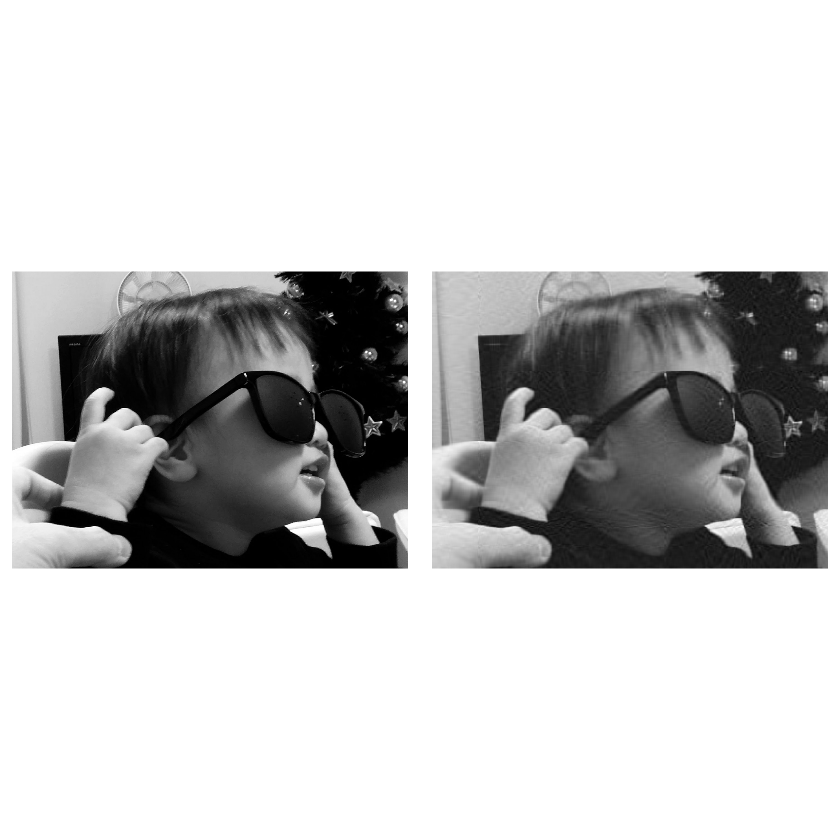

In [188]:
library(magick)
url <- "https://github.com/taroyabuki/comath/raw/main/images/boy.jpg"
image <- image_convert(image_read(url), colorspace = "gray") # 画像の読み込み
A <- as.integer(image_data(image))[, , 1]; A <- A / max(A)   # 行列への変換
tmp <- svd(A); U <- tmp$u; s <- tmp$d; V <- tmp$v            # 特異値分解
k <- 52
Ak <- U[, 1:k] %*% diag(s[1:k], k) %*% t(V[, 1:k]) # 近似
B <- (Ak - min(Ak)) / (max(Ak) - min(Ak))          # 数値を0～1にする．
par(mar = rep(0.5, 4), mfrow = c(1, 2)) # 余白を0.5にして，並べて表示する．
plot(as.raster(A)); plot(as.raster(B))

In [189]:
svd2 <- function(A, tol = 10e-10) {
  m <- nrow(A); n <- ncol(A); G <- t(A) %*% A                # ①
  eigs <- eigen(G); vals = eigs$values; vecs <- eigs$vectors # ②
  s <- sqrt(vals[vals > tol]); r <- length(s)                # ③
  if (r != 0) {
    Sr <- diag(s, r)                                         # ④
    Vr <- qr.Q(qr(vecs[, 1:r]))                              # ⑤
    Ur <- A %*% Vr %*% diag(1 / s, r)                        # ⑥
    S <- 0 * A; S[1:r, 1:r] <- Sr # S != diag(s, m, n)       # ⑦
    V <- cbind(Vr, MASS::Null(Vr))                           # ⑨
    U <- cbind(Ur, MASS::Null(Ur))                           # ⑨
  } else {
    S <- 0 * A; V <- diag(n); U <- diag(m)
    Sr <- matrix(0); Vr <- V[, 1, drop=FALSE]; Ur <- U[, 1, drop=FALSE]
  }
  list(Ur = Ur, Sr = Sr, Vr = Vr, U = U, S = S, V = V)
}

A <- rbind(c(1, 0), c(1, 1), c(0, 1)); svd2(A) # 動作確認

$Ur
           [,1]          [,2]
[1,] -0.4082483 -7.071068e-01
[2,] -0.8164966 -1.110223e-16
[3,] -0.4082483  7.071068e-01

$Sr
         [,1] [,2]
[1,] 1.732051    0
[2,] 0.000000    1

$Vr
           [,1]       [,2]
[1,] -0.7071068 -0.7071068
[2,] -0.7071068  0.7071068

$U
           [,1]          [,2]       [,3]
[1,] -0.4082483 -7.071068e-01  0.5773503
[2,] -0.8164966 -1.110223e-16 -0.5773503
[3,] -0.4082483  7.071068e-01  0.5773503

$S
         [,1] [,2]
[1,] 1.732051    0
[2,] 0.000000    1
[3,] 0.000000    0

$V
           [,1]       [,2]
[1,] -0.7071068 -0.7071068
[2,] -0.7071068  0.7071068

In [190]:
isOrtho <- function(A) all.equal(t(A) %*% A, diag(ncol(A)))
isSquare <- function(A) nrow(A) == ncol(A)
isDiagDesc <- function(A) {
  d = diag(A); all.equal(d, sort(abs(d), decreasing = TRUE));
}

A <- rbind(c(1, 0), c(1, 1), c(0, 1))
tmp <- svd2(A)                                      # 特異値分解
Ur <- tmp$Ur; Sr <- tmp$Sr; Vr <- tmp$Vr; U <- tmp$U; S <- tmp$S; V <- tmp$V
c(isOrtho(Ur), isOrtho(Vr), isOrtho(U), isOrtho(V), # ①
  isSquare(U), isSquare(V),                         # ②
  isDiagDesc(Sr), isDiagDesc(S),                    # ③
  all.equal(A, Ur %*% Sr %*% t(Vr)),                # ④-1
  all.equal(A, U %*% S %*% t(V)))                   # ④-2

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [191]:
A <- rbind(c(1, 0), c(1, 1), c(0, 1)); MASS::ginv(A)

0.6666667,0.3333333,-0.3333333
-0.3333333,0.3333333,0.6666667


In [192]:
A <- rbind(c(1, 0), c(1, 1), c(0, 1)); b <- c(2, 0, 2)
MASS::ginv(A) %*% b

0.6666667
0.6666667
